## Трифонов Никита Дмитриевич  
### tg: @qwertypine
### trifonov28rus@gmail.com
### 89150074773

Используя предоставленный набор данных необходимо разработать максимально эффективную скоринговую карту (преимущественно используемый подход в группе компаний - логистическая регрессия)  
Событие, на котором необходимо произвести разработку обозначены - risk_event  
Как результат - предоставить отчет со значениями: корреляций переменных, gini модели на development и test семплах, accuracy, WOE переменных, раскладку полной выборки согласно разработанной модели

## Загрузка необходимых библиотек и чтение данных

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from time import *
import scipy
import json
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\ntrifonov\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['time']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [2]:
data = pd.read_excel('vnabt.xlsx')

In [3]:
data.head(5)

,application_id,application_date_created,application_week_created,application_month_created,loan_date_created,loan_week_created,loan_month_created,amount_issued,loan_duration,risk_event,...,param_316,param_317,param_318,param_319,param_320,param_321,param_322,param_323,param_324,param_325
0,453055,2020-11-28,2020. 48 week. 23 Nov-29 Nov,2020-11-01,2020-12-01,2020. 49 week. 30 Nov-06 Dec,2020-12-01,1000000,10,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,454384,2020-11-29,2020. 48 week. 23 Nov-29 Nov,2020-11-01,2020-12-01,2020. 49 week. 30 Nov-06 Dec,2020-12-01,600000,10,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,454971,2020-11-29,2020. 48 week. 23 Nov-29 Nov,2020-11-01,2020-12-01,2020. 49 week. 30 Nov-06 Dec,2020-12-01,800000,10,0,...,NaN,NaN,NaN,1.0,7.0,NaN,NaN,NaN,NaN,NaN
3,455036,2020-11-29,2020. 48 week. 23 Nov-29 Nov,2020-11-01,2020-12-01,2020. 49 week. 30 Nov-06 Dec,2020-12-01,800000,10,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,455152,2020-11-29,2020. 48 week. 23 Nov-29 Nov,2020-11-01,2020-12-01,2020. 49 week. 30 Nov-06 Dec,2020-12-01,1000000,10,0,...,NaN,4.0,4.0,4.0,6.0,NaN,NaN,NaN,NaN,NaN


__!!! Выборка не стратифицирована__

In [4]:
np.mean(data['risk_event'])

0.2599324433006273

In [5]:
data.describe()

,application_id,amount_issued,loan_duration,risk_event,param_2,param_3,param_4,param_5,param_6,param_7,...,param_316,param_317,param_318,param_319,param_320,param_321,param_322,param_323,param_324,param_325
count,6217.000000,6.217000e+03,6217.000000,6217.000000,6217.000000,6217.0,6217.000000,6217.0,6217.000000,6217.000000,...,917.000000,2316.000000,3779.000000,4424.000000,4662.000000,319.000000,928.000000,1776.000000,2392.000000,2721.000000
mean,487255.778832,5.523243e+05,9.490590,0.259932,2.375744,1.0,0.039408,0.0,1.388612,1.828856,...,4.197383,5.136442,6.598042,8.649638,10.164736,1.191223,1.358836,1.564189,1.794732,1.934215
std,18699.921175,2.538852e+05,1.177444,0.438633,59.878330,0.0,1.429901,0.0,0.487474,0.376665,...,3.153509,5.637612,6.724843,8.428510,9.941229,0.596993,0.846025,1.159573,1.584404,1.802289
min,453055.000000,1.000000e+05,5.000000,0.000000,0.000000,1.0,0.000000,0.0,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,470809.000000,3.000000e+05,10.000000,0.000000,0.000000,1.0,0.000000,0.0,1.000000,2.000000,...,1.000000,2.000000,3.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,486217.000000,5.000000e+05,10.000000,0.000000,0.000000,1.0,0.000000,0.0,1.000000,2.000000,...,4.000000,4.000000,5.000000,7.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,503209.000000,8.000000e+05,10.000000,1.000000,2.000000,1.0,0.000000,0.0,2.000000,2.000000,...,6.000000,7.000000,9.000000,12.000000,13.000000,1.000000,1.000000,2.000000,2.000000,2.000000
max,523242.000000,2.000000e+06,10.000000,1.000000,3365.000000,1.0,99.000000,0.0,2.000000,2.000000,...,23.000000,202.000000,206.000000,212.000000,212.000000,6.000000,7.000000,10.000000,12.000000,15.000000


## Порождение признакового пространства

### Первичная чистка данных

* Для уменьшения признакового пространтсва и упрощения дальнейшей работы с данными очистим датасет от заведомо лишних столбцов

Воспользуемся классом FeatureSelector, ссылка на github:  
https://github.com/WillKoehrsen/feature-selector/blob/master/feature_selector/feature_selector.py

In [6]:
%run ./FeatureSelector.ipynb

In [7]:
X = data.copy()
del X['risk_event']
Y = data['risk_event'].copy()

In [8]:
fs = FeatureSelector(X, labels=Y)

In [9]:
# число пропусков
fs.identify_missing(missing_threshold = 0.60)

60 features with greater than 0.60 missing values.



In [10]:
# коллинеарные признаки
fs.identify_collinear(correlation_threshold=0.85)

65 features with a correlation magnitude greater than 0.85.



In [11]:
# список признаков для удаления
collinear_features = fs.ops['collinear']

# датафрейм коллинеарных признаков
fs.record_collinear.head()

,drop_feature,corr_feature,corr_value
0,param_4,param_2,0.955263
1,param_11,param_6,-0.964764
2,param_12,application_id,-0.979227
3,param_12,loan_duration,-1.000000
4,param_12,param_2,1.000000


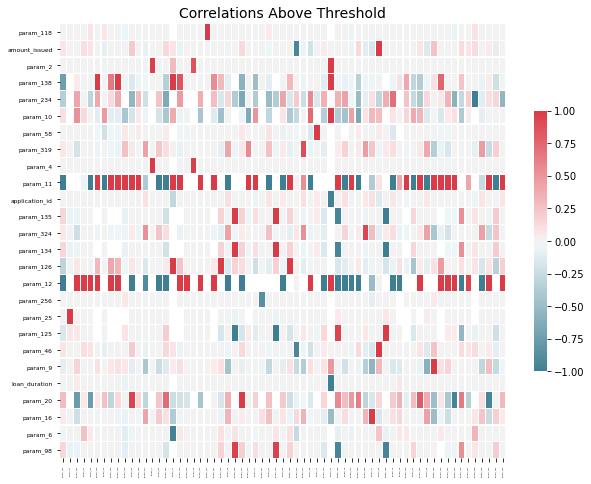

In [12]:
fs.plot_collinear(plot_all=False)

In [13]:
# Проверим на наличие столбцов с единственным значением
fs.identify_single_unique()

68 features with a single unique value.



In [14]:
X_train = fs.remove(methods = ['missing', 'collinear', 'single_unique'], keep_one_hot=False)

Data has not been one-hot encoded
Removed 184 features including one-hot features.


In [15]:
params_fs_list = list(X_train.columns)[8:]

In [16]:
data.shape

(6217, 335)

In [17]:
first_columns_list = list(data.columns)[:10]

In [18]:
# объединим первые признаки + очищенные признаки-параметры
data = data[first_columns_list].join(data[params_fs_list]).copy()

In [19]:
# удалим одинаковые столбцы

df = data.copy()

remove = []
cols = df.columns
for i in range(len(cols)-1):
    v = df[cols[i]].values
    for j in range(i+1,len(cols)):
        if np.array_equal(v,df[cols[j]].values):
            remove.append(cols[j])

df.drop(remove, axis=1, inplace=True)

data = df.copy()

In [20]:
# проверка на дубликаты
data.drop_duplicates(keep=False)

,application_id,application_date_created,application_week_created,application_month_created,loan_date_created,loan_week_created,loan_month_created,amount_issued,loan_duration,risk_event,...,param_293,param_294,param_295,param_304,param_305,param_306,param_310,param_313,param_318,param_319
0,453055,2020-11-28,2020. 48 week. 23 Nov-29 Nov,2020-11-01,2020-12-01,2020. 49 week. 30 Nov-06 Dec,2020-12-01,1000000,10,0,...,False,False,True,1,True,True,2020-11-28 17:02:50.700,0.940,NaN,NaN
1,454384,2020-11-29,2020. 48 week. 23 Nov-29 Nov,2020-11-01,2020-12-01,2020. 49 week. 30 Nov-06 Dec,2020-12-01,600000,10,1,...,False,False,NaN,0,False,NaN,2020-11-30 11:03:03.194,0.940,NaN,NaN
2,454971,2020-11-29,2020. 48 week. 23 Nov-29 Nov,2020-11-01,2020-12-01,2020. 49 week. 30 Nov-06 Dec,2020-12-01,800000,10,0,...,False,False,False,0,False,False,2020-11-29 13:03:00.140,0.887,NaN,1.0
3,455036,2020-11-29,2020. 48 week. 23 Nov-29 Nov,2020-11-01,2020-12-01,2020. 49 week. 30 Nov-06 Dec,2020-12-01,800000,10,0,...,False,False,False,0,False,False,2020-11-29 17:02:55.433,0.940,NaN,NaN
4,455152,2020-11-29,2020. 48 week. 23 Nov-29 Nov,2020-11-01,2020-12-01,2020. 49 week. 30 Nov-06 Dec,2020-12-01,1000000,10,0,...,False,False,True,1,True,True,2020-11-29 15:03:00.409,0.901,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6212,521834,2020-12-22,2020. 52 week. 21 Dec-27 Dec,2020-12-01,2020-12-22,2020. 52 week. 21 Dec-27 Dec,2020-12-01,200000,10,1,...,False,False,True,0,False,False,2020-12-23 00:08:15.300,0.940,NaN,2.0
6213,521835,2020-12-22,2020. 52 week. 21 Dec-27 Dec,2020-12-01,2020-12-22,2020. 52 week. 21 Dec-27 Dec,2020-12-01,700000,10,0,...,False,False,False,0,False,False,2020-12-23 00:08:15.300,0.927,3.0,8.0
6214,521877,2020-12-22,2020. 52 week. 21 Dec-27 Dec,2020-12-01,2020-12-22,2020. 52 week. 21 Dec-27 Dec,2020-12-01,200000,10,0,...,NaN,False,False,0,False,False,2020-12-23 05:03:26.351,0.963,11.0,25.0
6215,521903,2020-12-22,2020. 52 week. 21 Dec-27 Dec,2020-12-01,2020-12-22,2020. 52 week. 21 Dec-27 Dec,2020-12-01,500000,10,0,...,False,False,True,0,False,True,2020-12-23 05:03:26.351,0.940,NaN,NaN


In [21]:
# чтобы отображались все столбцы
pd.set_option('display.max_columns', None)

Посмотрим на датасет в поисках инсайдов

In [22]:
data.head(8)

,application_id,application_date_created,application_week_created,application_month_created,loan_date_created,loan_week_created,loan_month_created,amount_issued,loan_duration,risk_event,param_1,param_2,param_6,param_7,param_8,param_9,param_13,param_14,param_16,param_21,param_23,param_24,param_25,param_28,param_29,param_32,param_33,param_34,param_35,param_36,param_38,param_40,param_42,param_44,param_47,param_48,param_51,param_54,param_74,param_81,param_84,param_87,param_89,param_92,param_93,param_94,param_98,param_99,param_100,param_109,param_110,param_113,param_114,param_115,param_116,param_118,param_122,param_128,param_129,param_130,param_131,param_132,param_143,param_148,param_149,param_156,param_157,param_158,param_161,param_162,param_163,param_167,param_168,param_169,param_185,param_186,param_188,param_189,param_191,param_192,param_193,param_196,param_198,param_201,param_203,param_204,param_205,param_209,param_210,param_214,param_222,param_225,param_226,param_227,param_228,param_229,param_235,param_236,param_238,param_239,param_240,param_245,param_246,param_247,param_248,param_249,param_250,param_251,param_252,param_253,param_254,param_255,param_256,param_258,param_259,param_260,param_261,param_262,param_263,param_266,param_267,param_268,param_269,param_270,param_271,param_272,param_273,param_274,param_275,param_276,param_277,param_278,param_286,param_289,param_290,param_291,param_292,param_293,param_294,param_295,param_304,param_305,param_306,param_310,param_313,param_318,param_319
0,453055,2020-11-28,2020. 48 week. 23 Nov-29 Nov,2020-11-01,2020-12-01,2020. 49 week. 30 Nov-06 Dec,2020-12-01,1000000,10,0,Asia/Bangkok,0,2,2,15000000.0,4000000,0,0,0,0,1.0,1,0,0,1,0.0,0.0,0.0,0.0,0.0,0,0,0,0,25,N,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Ha Noi,Hanoi,Viettel Group,viettel.com.vn,Viettel Mobile,ISP/MOB,0.0,2018-02-28,Mobile Phone,Apple,iPhone,iPhone,Apple,1.0,24.0,NaN,vi-vn,iOS,14_2,Safari,14.0.1,WebKit,0.0,0.0,0.0,dns1.vietel.com.vn,203.113.131.1,100000,NaN,0.0,0.0,12.0,116.96.80.15,0.0,NaN,2,2,False,1,30/09/2021,117.7.198.19,Viettel Mobile,True,False,NaN,False,False,0,False,0,0e687c6a-3182-11eb-b82f-d37e3f738021,2020-11-28 17:02:52.330,0,True,gmail.com,.com,1995-08-13 04:00:00,2020-07-11 09:32:49,2021-08-12 04:00:00,True,MarkMonitor Inc.,Google LLC,False,True,True,True,True,False,False,True,0,True,True,1,True,False,True,True,False,False,False,False,True,0,False,NaN,True,False,False,False,True,1,True,True,2020-11-28 17:02:50.700,0.940,NaN,NaN
1,454384,2020-11-29,2020. 48 week. 23 Nov-29 Nov,2020-11-01,2020-12-01,2020. 49 week. 30 Nov-06 Dec,2020-12-01,600000,10,1,Asia/Ho_Chi_Minh,1,2,2,7000000.0,4000000,0,0,0,0,52.0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0,0,0,0,21,N,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,Dong Nai,Bien Hoa,Vietnam Posts and Telecommunications Group,vnpt.com.vn,Vinaphone,ISP/MOB,1.0,2017-11-30,Mobile Phone,Samsung,SM-A705F,Galaxy A70,Samsung,1.0,24.0,4.0,vi-VN|en-US,Android,10,Chrome Mobile,87.0.4280.66,WebKit,0.0,0.0,0.0,vnpt.vn,113.164.235.121,820000,0.0,1.0,0.0,2.0,113.185.73.255,0.0,8.0,0,0,False,0,NaN,113.185.85.169,Vinaphone,True,True,False,False,False,0,NaN,0,1b26895a-32e2-11eb-af29-fb603e9e0e30,2020-11-30 11:03:06.441,1,True,gmail.com,.com,1995-08-13 04:00:00,2020-07-11 09:32:49,2021-08-12 04:00:00,True,MarkMonitor Inc.,Google LLC,False,True,True,True,True,False,False,True,0,True,True,0,NaN,False,False,False,False,False,False,NaN,False,0,False,False,False,False,False,False,NaN,0,False,NaN,2020-11-30 11:03:03.194,0.940,NaN,NaN
2,454971,2020-11-29,2020. 48 week. 23 Nov-29 Nov,2020-11-01,2020-12-01,2020. 49 week. 30 Nov-06 Dec,2020-12-01,800000,10,0,Asia/Ho_Chi_Minh,0,2,2,10000000.0,4000000,1,0,0,0,11.0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0,0,0,0,37,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3,False,1,31/12/2020,1.55.117.172,MobiFone,True,True,False,F

In [23]:
data.groupby('param_122').size()

param_122
2015-12-31    101
2016-05-31     27
2016-06-30      7
2016-09-30      4
2016-10-31      2
2016-11-30      8
2017-01-31      2
2017-03-31      4
2017-04-30      3
2017-07-31      2
2017-08-31      4
2017-09-30      1
2017-10-31      5
2017-11-30    730
2017-12-31     53
2018-01-31     22
2018-02-28     27
2018-03-31     19
2018-04-30     57
2018-05-31     41
2018-06-30     31
2018-07-31     34
2018-08-31     51
2018-09-30     32
2018-10-31    138
2018-11-30     21
2018-12-31     34
2019-01-31     20
2019-02-28    101
2019-04-30     35
2019-05-31     23
2019-06-30     21
2019-07-31     45
2019-08-31     58
2019-09-30     55
2019-10-31     51
2019-11-30    343
2019-12-31     46
2020-01-31    104
2020-02-29     94
2020-03-31    103
2020-04-30    119
2020-05-31    145
2020-06-30    160
2020-07-31    243
2020-08-31    334
2020-09-30    519
2020-10-31    954
2020-11-30    568
dtype: int64

In [24]:
data.groupby('param_210').size()

param_210
01/01/2015       1
01/01/2017       1
01/01/2018       1
01/01/2019       5
01/01/2021       2
              ... 
31/12/2019      23
31/12/2020    1154
31/12/2021      13
31/12/2022       1
31/12/2023       1
Length: 651, dtype: int64

In [25]:
data.groupby('param_240').size()

param_240
2020-11-28 17:02:52.330    1
2020-11-29 13:03:02.828    1
2020-11-29 15:03:03.487    1
2020-11-29 17:02:57.113    1
2020-11-29 21:02:29.940    1
                          ..
2020-12-22 19:03:00.956    9
2020-12-22 21:02:38.845    6
2020-12-23 00:08:17.780    6
2020-12-23 05:03:28.827    4
2020-12-23 13:03:36.632    1
Length: 212, dtype: int64

In [26]:
data.groupby('param_249').size()

param_249
1991-12-20 05:00:00       6
1994-01-31 05:00:00       1
1995-01-18 05:00:00     112
1995-08-13 04:00:00    6025
1996-08-01 00:00:00       1
1997-03-24 05:00:00       2
1997-11-26 05:00:00       1
1998-04-27 04:00:00       1
1999-01-15 05:00:00      31
1999-03-03 05:00:00       1
1999-10-21 18:43:54       1
2000-06-03 15:46:45       1
2001-02-22 11:31:59       1
2001-11-16 20:27:36       1
2002-07-04 11:37:31       1
2003-11-12 05:17:01       1
2003-12-17 19:11:47       1
2004-04-01 02:16:05       1
2005-08-08 11:50:25       1
2010-01-04 19:13:13       1
2010-02-25 01:03:45       2
2011-05-12 18:09:55       1
2015-03-17 18:18:35       1
2015-06-07 18:33:45       1
dtype: int64

In [27]:
data.groupby('param_250').size()

param_250
2015-05-04 19:04:32       1
2017-01-29 20:58:47       1
2017-06-22 02:27:37       1
2018-11-13 09:31:45       1
2019-11-30 06:39:10       1
2019-12-09 02:05:31       6
2019-12-18 08:36:32       1
2019-12-18 13:37:09     112
2019-12-26 03:48:25       1
2020-01-28 10:35:29       2
2020-01-31 10:11:59       1
2020-02-05 00:00:00       1
2020-02-29 10:39:19       1
2020-03-06 17:39:24       1
2020-03-07 03:54:39       1
2020-03-26 07:05:03       2
2020-05-01 02:31:36       1
2020-06-04 21:50:03      31
2020-06-05 04:28:26       1
2020-07-05 07:14:07       1
2020-07-11 09:32:49    6025
2020-08-08 14:52:50       1
2020-10-21 19:10:41       1
2020-10-24 09:31:58       1
dtype: int64

In [28]:
data.groupby('param_251').size()

param_251
2020-12-17 19:11:47       1
2021-01-15 05:00:00      31
2021-02-01 05:00:00       1
2021-02-22 11:31:59       1
2021-02-24 23:59:59       2
2021-03-03 05:00:00       1
2021-03-09 00:00:00       1
2021-03-17 18:18:35       1
2021-03-25 04:00:00       2
2021-04-01 01:16:05       1
2021-06-07 18:33:45       1
2021-07-04 11:43:01       1
2021-08-08 11:50:25       1
2021-08-12 04:00:00    6025
2021-11-12 05:17:01       1
2021-11-25 05:00:00       1
2022-04-26 04:00:00       1
2022-06-08 01:40:10       1
2023-01-19 05:00:00     112
2023-05-12 18:09:55       1
2024-11-16 20:27:36       1
2025-12-19 05:00:00       6
2027-06-03 15:46:45       1
2030-10-21 18:43:54       1
dtype: int64

In [29]:
# временные признаки, удаляем из соображений вариативности "на глаз"
del data['param_249']
del data['param_250']
del data['param_251']

# Номер договора (?)
del data['param_239']

__Данные:__  


* _Дата/время:__  
    * param_122  
    * param_210 (преобразовать)
    * param_240  
    * ~~param_249~~  
    * ~~param_250~~   
    * ~~param_251~~   
    * param_310  

    
* IP-адрес:
    * param_162  
    * param_186  
    * param_196
    * param_214
 
Извлечение признаков из IP-адреса - отдельное искусство:  
[Ссылка 1](https://medium.com/@zzpp/ip-address-feature-extraction-c1d623bd584c)  
[Ссылка 2](https://www.quora.com/How-can-I-deal-with-IP-addresses-in-machine-learning-algorithms-in-traffic-analysis-and-anomaly-detection)

# ~~Сделаем после отбора признаков~~

Здесь было видно что перцентили скачут, есть подозрение на выбросы - из-за них могут быть проблемы (см. max для data.describe()) выше

In [30]:
#data.nunique()[data.nunique()>30].index # больше 30 уникальных значений => вещественный признак

In [31]:
"""
param_real = ['param_8', 'param_9', 'param_14', 'param_23',
               'param_45', 'param_47', 'param_49', 'param_77', 'param_87', 'param_102',
               'param_104', 'param_106', 'param_109', 'param_110', 'param_111',
               'param_112', 'param_122', 'param_123', 'param_129', 'param_130',
               'param_131', 'param_136', 'param_144', 'param_145', 'param_151',
               'param_156', 'param_158', 'param_162', 'param_182', 'param_183',
               'param_188', 'param_190', 'param_195', 'param_196', 'param_197',
               'param_210', 'param_214', 'param_215', 'param_237', 'param_239',
               'param_240', 'param_241', 'param_242', 'param_247', 'param_264',
               'param_265', 'param_279', 'param_280', 'param_297', 'param_299',
               'param_300', 'param_301', 'param_303', 'param_308', 'param_309',
               'param_310', 'param_311', 'param_312', 'param_313', 'param_318',
               'param_319', 'param_320']
"""

"\nparam_real = ['param_8', 'param_9', 'param_14', 'param_23',\n               'param_45', 'param_47', 'param_49', 'param_77', 'param_87', 'param_102',\n               'param_104', 'param_106', 'param_109', 'param_110', 'param_111',\n               'param_112', 'param_122', 'param_123', 'param_129', 'param_130',\n               'param_131', 'param_136', 'param_144', 'param_145', 'param_151',\n               'param_156', 'param_158', 'param_162', 'param_182', 'param_183',\n               'param_188', 'param_190', 'param_195', 'param_196', 'param_197',\n               'param_210', 'param_214', 'param_215', 'param_237', 'param_239',\n               'param_240', 'param_241', 'param_242', 'param_247', 'param_264',\n               'param_265', 'param_279', 'param_280', 'param_297', 'param_299',\n               'param_300', 'param_301', 'param_303', 'param_308', 'param_309',\n               'param_310', 'param_311', 'param_312', 'param_313', 'param_318',\n               'param_319', 'param_32

In [32]:
"""
pd.set_option('display.max_columns', None)
data[param_real].describe()
"""

"\npd.set_option('display.max_columns', None)\ndata[param_real].describe()\n"

In [33]:
"""
strange = ['param_14', 
           'param_23',
           'param_47',
           'param_77',
           'param_87',
           'param_104',
           'param_123',
           'param_136',
           'param_151',
           'param_182',
           'param_183',
           'param_190',
           'param_195',
           'param_301',
           'param_307',
           'param_318',
           'param_319',
           'param_320'
          ]
"""

"\nstrange = ['param_14', \n           'param_23',\n           'param_47',\n           'param_77',\n           'param_87',\n           'param_104',\n           'param_123',\n           'param_136',\n           'param_151',\n           'param_182',\n           'param_183',\n           'param_190',\n           'param_195',\n           'param_301',\n           'param_307',\n           'param_318',\n           'param_319',\n           'param_320'\n          ]\n"

In [34]:
# import seaborn as sns

In [35]:
"""
for i in strange:
    plt.figure(figsize=(16, 12))
    sns.distplot(data[i], label=i)
    plt.xlabel('Признак')
    plt.ylabel('Частота')
    plt.legend()
    plt.show()
"""

"\nfor i in strange:\n    plt.figure(figsize=(16, 12))\n    sns.distplot(data[i], label=i)\n    plt.xlabel('Признак')\n    plt.ylabel('Частота')\n    plt.legend()\n    plt.show()\n"

##  Преобразование данных

__Признаки:__ 

* Временные
* Бинарные
* Категориальные
* Вещественные  


#### Временные признаки  

* application_week_created 
* loan_week_created
* param_122  
* param_210 (преобразовать)
* param_240  
* param_310  

In [36]:
datetime_features = ['application_date_created', 
                    'loan_date_created',
                    'param_122',
                    'param_210',
                    'param_240',  
                    'param_310' ]

In [37]:
data[datetime_features]

,application_date_created,loan_date_created,param_122,param_210,param_240,param_310
0,2020-11-28,2020-12-01,2018-02-28,30/09/2021,2020-11-28 17:02:52.330,2020-11-28 17:02:50.700
1,2020-11-29,2020-12-01,2017-11-30,NaN,2020-11-30 11:03:06.441,2020-11-30 11:03:03.194
2,2020-11-29,2020-12-01,NaT,31/12/2020,2020-11-29 13:03:02.828,2020-11-29 13:03:00.140
3,2020-11-29,2020-12-01,2017-11-30,NaN,2020-11-29 17:02:57.113,2020-11-29 17:02:55.433
4,2020-11-29,2020-12-01,2020-06-30,31/12/2010,2020-11-29 15:03:03.487,2020-11-29 15:03:00.409
...,...,...,...,...,...,...
6212,2020-12-22,2020-12-22,2019-08-31,NaN,2020-12-23 00:08:17.780,2020-12-23 00:08:15.300
6213,2020-12-22,2020-12-22,2020-09-30,NaN,2020-12-23 00:08:17.780,2020-12-23 00:08:15.300
6214,2020-12-22,2020-12-22,2019-08-31,NaN,2020-12-23 05:03:28.827,2020-12-23 05:03:26.351
6215,2020-12-22,2020-12-22,2018-08-31,NaN,2020-12-23 05:03:28.827,2020-12-23 05:03:26.351


#### application_date_created и loan_date_created

In [38]:
# выделим номер недели

for i in range(data.shape[0]):
    # application
    data['application_week_created'][i] = int(data['application_week_created'][i][6:8])
    
    # loan
    data['loan_week_created'][i] = int(data['loan_week_created'][i][6:8])

<ipython-input-38-facffa178772>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['application_week_created'][i] = int(data['application_week_created'][i][6:8])
<ipython-input-38-facffa178772>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['loan_week_created'][i] = int(data['loan_week_created'][i][6:8])


In [39]:
data.head(5)

,application_id,application_date_created,application_week_created,application_month_created,loan_date_created,loan_week_created,loan_month_created,amount_issued,loan_duration,risk_event,param_1,param_2,param_6,param_7,param_8,param_9,param_13,param_14,param_16,param_21,param_23,param_24,param_25,param_28,param_29,param_32,param_33,param_34,param_35,param_36,param_38,param_40,param_42,param_44,param_47,param_48,param_51,param_54,param_74,param_81,param_84,param_87,param_89,param_92,param_93,param_94,param_98,param_99,param_100,param_109,param_110,param_113,param_114,param_115,param_116,param_118,param_122,param_128,param_129,param_130,param_131,param_132,param_143,param_148,param_149,param_156,param_157,param_158,param_161,param_162,param_163,param_167,param_168,param_169,param_185,param_186,param_188,param_189,param_191,param_192,param_193,param_196,param_198,param_201,param_203,param_204,param_205,param_209,param_210,param_214,param_222,param_225,param_226,param_227,param_228,param_229,param_235,param_236,param_238,param_240,param_245,param_246,param_247,param_248,param_252,param_253,param_254,param_255,param_256,param_258,param_259,param_260,param_261,param_262,param_263,param_266,param_267,param_268,param_269,param_270,param_271,param_272,param_273,param_274,param_275,param_276,param_277,param_278,param_286,param_289,param_290,param_291,param_292,param_293,param_294,param_295,param_304,param_305,param_306,param_310,param_313,param_318,param_319
0,453055,2020-11-28,48,2020-11-01,2020-12-01,49,2020-12-01,1000000,10,0,Asia/Bangkok,0,2,2,15000000.0,4000000,0,0,0,0,1.0,1,0,0,1,0.0,0.0,0.0,0.0,0.0,0,0,0,0,25,N,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Ha Noi,Hanoi,Viettel Group,viettel.com.vn,Viettel Mobile,ISP/MOB,0.0,2018-02-28,Mobile Phone,Apple,iPhone,iPhone,Apple,1.0,24.0,NaN,vi-vn,iOS,14_2,Safari,14.0.1,WebKit,0.0,0.0,0.0,dns1.vietel.com.vn,203.113.131.1,100000,NaN,0.0,0.0,12.0,116.96.80.15,0.0,NaN,2,2,False,1,30/09/2021,117.7.198.19,Viettel Mobile,True,False,NaN,False,False,0,False,0,2020-11-28 17:02:52.330,0,True,gmail.com,.com,True,MarkMonitor Inc.,Google LLC,False,True,True,True,True,False,False,True,0,True,True,1,True,False,True,True,False,False,False,False,True,0,False,NaN,True,False,False,False,True,1,True,True,2020-11-28 17:02:50.700,0.940,NaN,NaN
1,454384,2020-11-29,48,2020-11-01,2020-12-01,49,2020-12-01,600000,10,1,Asia/Ho_Chi_Minh,1,2,2,7000000.0,4000000,0,0,0,0,52.0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0,0,0,0,21,N,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,Dong Nai,Bien Hoa,Vietnam Posts and Telecommunications Group,vnpt.com.vn,Vinaphone,ISP/MOB,1.0,2017-11-30,Mobile Phone,Samsung,SM-A705F,Galaxy A70,Samsung,1.0,24.0,4.0,vi-VN|en-US,Android,10,Chrome Mobile,87.0.4280.66,WebKit,0.0,0.0,0.0,vnpt.vn,113.164.235.121,820000,0.0,1.0,0.0,2.0,113.185.73.255,0.0,8.0,0,0,False,0,NaN,113.185.85.169,Vinaphone,True,True,False,False,False,0,NaN,0,2020-11-30 11:03:06.441,1,True,gmail.com,.com,True,MarkMonitor Inc.,Google LLC,False,True,True,True,True,False,False,True,0,True,True,0,NaN,False,False,False,False,False,False,NaN,False,0,False,False,False,False,False,False,NaN,0,False,NaN,2020-11-30 11:03:03.194,0.940,NaN,NaN
2,454971,2020-11-29,48,2020-11-01,2020-12-01,49,2020-12-01,800000,10,0,Asia/Ho_Chi_Minh,0,2,2,10000000.0,4000000,1,0,0,0,11.0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0,0,0,0,37,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3,False,1,31/12/2020,1.55.117.172,MobiFone,True,True,False,False,False,0,NaN,0,2020-11-29 13:03:02.828,1,True,gmail.com,.com,True,MarkMonitor Inc.,Google LLC,False,True,True,True,True,False,False,True,0,True,True,0,False,False,False,False,False,False,False,False,False,0,False,False,False,False,False,False,False,0,False,False,2020-11-29 13:03:00.140,0.887,NaN,1.0
3,455036,2020-11-29,48,2020-11-01,2020-12-01,49,2020-12-01,800000,10,0,Asia/Ho_Chi_Mi

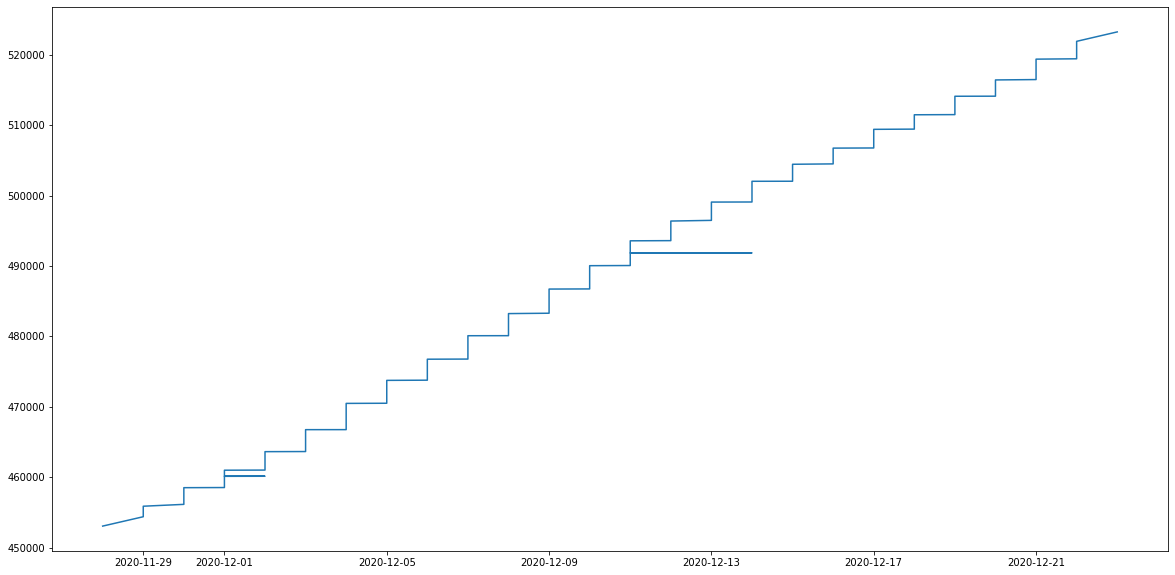

In [40]:
plt.figure(figsize=(20,10))
plt.plot(data['application_date_created'], data['application_id'])

In [41]:
data['loan_month_created'] = data['loan_month_created'].dt.month
data['loan_month_created']

# потом будет отбор признаков по вариативности, поэтому этот признак также уйдет

0       12
1       12
2       12
3       12
4       12
        ..
6212    12
6213    12
6214    12
6215    12
6216    12
Name: loan_month_created, Length: 6217, dtype: int64

In [42]:
# разница между выдачей займа и заявкой

data['loan_application_days'] = (data['loan_date_created'] - data['application_date_created']).dt.days.copy()

In [43]:
# выдлеим месяца, дни и дни недели (год фиксирован)

# application
data['application_date_month'] = data['application_date_created'].dt.month.copy()
data['application_date_day'] = data['application_date_created'].dt.day.copy()
data['application_date_dayofweek'] = data['application_date_created'].dt.dayofweek.copy()

# loan
data['loan_date_month'] = data['loan_date_created'].dt.month.copy()
data['loan_date_day'] = data['loan_date_created'].dt.day.copy()
data['loan_date_dayofweek'] = data['loan_date_created'].dt.dayofweek.copy()

In [44]:
list(data.columns)

['application_id',
 'application_date_created',
 'application_week_created',
 'application_month_created',
 'loan_date_created',
 'loan_week_created',
 'loan_month_created',
 'amount_issued',
 'loan_duration',
 'risk_event',
 'param_1',
 'param_2',
 'param_6',
 'param_7',
 'param_8',
 'param_9',
 'param_13',
 'param_14',
 'param_16',
 'param_21',
 'param_23',
 'param_24',
 'param_25',
 'param_28',
 'param_29',
 'param_32',
 'param_33',
 'param_34',
 'param_35',
 'param_36',
 'param_38',
 'param_40',
 'param_42',
 'param_44',
 'param_47',
 'param_48',
 'param_51',
 'param_54',
 'param_74',
 'param_81',
 'param_84',
 'param_87',
 'param_89',
 'param_92',
 'param_93',
 'param_94',
 'param_98',
 'param_99',
 'param_100',
 'param_109',
 'param_110',
 'param_113',
 'param_114',
 'param_115',
 'param_116',
 'param_118',
 'param_122',
 'param_128',
 'param_129',
 'param_130',
 'param_131',
 'param_132',
 'param_143',
 'param_148',
 'param_149',
 'param_156',
 'param_157',
 'param_158',
 'param

In [45]:
# удалим признаки datetime, т.к. с ними закончили 

# del data['application_id'] # не удаляем, т.к. могут быть закономерности

del data['application_date_created']
del data['application_month_created']
del data['loan_date_created']
del data['loan_month_created']

In [46]:
 data.head()

,application_id,application_week_created,loan_week_created,amount_issued,loan_duration,risk_event,param_1,param_2,param_6,param_7,param_8,param_9,param_13,param_14,param_16,param_21,param_23,param_24,param_25,param_28,param_29,param_32,param_33,param_34,param_35,param_36,param_38,param_40,param_42,param_44,param_47,param_48,param_51,param_54,param_74,param_81,param_84,param_87,param_89,param_92,param_93,param_94,param_98,param_99,param_100,param_109,param_110,param_113,param_114,param_115,param_116,param_118,param_122,param_128,param_129,param_130,param_131,param_132,param_143,param_148,param_149,param_156,param_157,param_158,param_161,param_162,param_163,param_167,param_168,param_169,param_185,param_186,param_188,param_189,param_191,param_192,param_193,param_196,param_198,param_201,param_203,param_204,param_205,param_209,param_210,param_214,param_222,param_225,param_226,param_227,param_228,param_229,param_235,param_236,param_238,param_240,param_245,param_246,param_247,param_248,param_252,param_253,param_254,param_255,param_256,param_258,param_259,param_260,param_261,param_262,param_263,param_266,param_267,param_268,param_269,param_270,param_271,param_272,param_273,param_274,param_275,param_276,param_277,param_278,param_286,param_289,param_290,param_291,param_292,param_293,param_294,param_295,param_304,param_305,param_306,param_310,param_313,param_318,param_319,loan_application_days,application_date_month,application_date_day,application_date_dayofweek,loan_date_month,loan_date_day,loan_date_dayofweek
0,453055,48,49,1000000,10,0,Asia/Bangkok,0,2,2,15000000.0,4000000,0,0,0,0,1.0,1,0,0,1,0.0,0.0,0.0,0.0,0.0,0,0,0,0,25,N,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Ha Noi,Hanoi,Viettel Group,viettel.com.vn,Viettel Mobile,ISP/MOB,0.0,2018-02-28,Mobile Phone,Apple,iPhone,iPhone,Apple,1.0,24.0,NaN,vi-vn,iOS,14_2,Safari,14.0.1,WebKit,0.0,0.0,0.0,dns1.vietel.com.vn,203.113.131.1,100000,NaN,0.0,0.0,12.0,116.96.80.15,0.0,NaN,2,2,False,1,30/09/2021,117.7.198.19,Viettel Mobile,True,False,NaN,False,False,0,False,0,2020-11-28 17:02:52.330,0,True,gmail.com,.com,True,MarkMonitor Inc.,Google LLC,False,True,True,True,True,False,False,True,0,True,True,1,True,False,True,True,False,False,False,False,True,0,False,NaN,True,False,False,False,True,1,True,True,2020-11-28 17:02:50.700,0.940,NaN,NaN,3,11,28,5,12,1,1
1,454384,48,49,600000,10,1,Asia/Ho_Chi_Minh,1,2,2,7000000.0,4000000,0,0,0,0,52.0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0,0,0,0,21,N,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,Dong Nai,Bien Hoa,Vietnam Posts and Telecommunications Group,vnpt.com.vn,Vinaphone,ISP/MOB,1.0,2017-11-30,Mobile Phone,Samsung,SM-A705F,Galaxy A70,Samsung,1.0,24.0,4.0,vi-VN|en-US,Android,10,Chrome Mobile,87.0.4280.66,WebKit,0.0,0.0,0.0,vnpt.vn,113.164.235.121,820000,0.0,1.0,0.0,2.0,113.185.73.255,0.0,8.0,0,0,False,0,NaN,113.185.85.169,Vinaphone,True,True,False,False,False,0,NaN,0,2020-11-30 11:03:06.441,1,True,gmail.com,.com,True,MarkMonitor Inc.,Google LLC,False,True,True,True,True,False,False,True,0,True,True,0,NaN,False,False,False,False,False,False,NaN,False,0,False,False,False,False,False,False,NaN,0,False,NaN,2020-11-30 11:03:03.194,0.940,NaN,NaN,2,11,29,6,12,1,1
2,454971,48,49,800000,10,0,Asia/Ho_Chi_Minh,0,2,2,10000000.0,4000000,1,0,0,0,11.0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0,0,0,0,37,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3,False,1,31/12/2020,1.55.117.172,MobiFone,True,True,False,False,False,0,NaN,0,2020-11-29 13:03:02.828,1,True,gmail.com,.com,True,MarkMonitor Inc.,Google LLC,False,True,True,True,True,False,False,True,0,True,True,0,False,False,False,False,False,False,False,False,False,0,False,False,False,False,False,False,False,0,False,False,2020-11-29 13:03:00.140,0.887,NaN,1.0,2,11,29,6,12,1,1
3,455036,48,49,800000,10,0,Asia/Ho_Chi_Minh,5,1,2,13000000.0,4000000,0,0,0,0,48.0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0

#### param_240 и param_310

Заметим, что __param_240__ и __param_310__ выглядят как логи с сайта - разница между временами в интервале нескольких секунд.

In [47]:
max(data['param_240']-data['param_310'])

Timedelta('0 days 00:01:31.362000')

In [48]:
min(data['param_240']-data['param_310'])

Timedelta('0 days 00:00:00.793000')

In [49]:
data['param_240_310_sec'] = (data['param_240']-data['param_310']).dt.total_seconds().copy()

In [50]:
del data['param_240']
del data['param_310']

#### param_122

In [51]:
data['param_122']

0      2018-02-28
1      2017-11-30
2             NaT
3      2017-11-30
4      2020-06-30
          ...    
6212   2019-08-31
6213   2020-09-30
6214   2019-08-31
6215   2018-08-31
6216   2017-11-30
Name: param_122, Length: 6217, dtype: datetime64[ns]

In [52]:
# param_122
data['param_122_date_month'] = data['param_122'].dt.month.copy()
data['param_122_date_day'] = data['param_122'].dt.day.copy()
data['param_122_date_dayofweek'] = data['param_122'].dt.dayofweek.copy()

In [53]:
del data['param_122']

#### param_210

In [54]:
data['param_210']

0       30/09/2021
1              NaN
2       31/12/2020
3              NaN
4       31/12/2010
           ...    
6212           NaN
6213           NaN
6214           NaN
6215           NaN
6216           NaN
Name: param_210, Length: 6217, dtype: object

In [55]:
data['param_210'] = data['param_210'].str.replace('/', '-', regex=True).copy()

In [56]:
data['param_210'] 

0       30-09-2021
1              NaN
2       31-12-2020
3              NaN
4       31-12-2010
           ...    
6212           NaN
6213           NaN
6214           NaN
6215           NaN
6216           NaN
Name: param_210, Length: 6217, dtype: object

In [57]:
data['param_210']  = pd.to_datetime(data['param_210'], format='%d-%m-%Y').copy()
data['param_210'].head(5)

0   2021-09-30
1          NaT
2   2020-12-31
3          NaT
4   2010-12-31
Name: param_210, dtype: datetime64[ns]

In [58]:
# param_210
data['param_210_date_month'] = data['param_210'].dt.month.copy()
data['param_210_date_day'] = data['param_210'].dt.day.copy()
data['param_210_date_dayofweek'] = data['param_210'].dt.dayofweek.copy()

In [59]:
del data['param_210']

Можем попробовать посчитать дельты по временам

### Продолжим отбор признаков

С временными признаками закончили, с остальным справится пакет FeatureSelector

In [60]:
X = data.copy()
del X['risk_event']
Y = data['risk_event'].copy()

In [61]:
fs = FeatureSelector(X, labels=Y)

In [62]:
# число пропусков
fs.identify_missing(missing_threshold = 0.60)

0 features with greater than 0.60 missing values.



In [63]:
# коллинеарные признаки
fs.identify_collinear(correlation_threshold=0.85)

3 features with a correlation magnitude greater than 0.85.



In [64]:
# список признаков для удаления
collinear_features = fs.ops['collinear']

# датафрейм коллинеарных признаков
fs.record_collinear.head()

,drop_feature,corr_feature,corr_value
0,application_date_day,application_id,0.893140
1,loan_date_day,application_id,0.996123
2,loan_date_day,application_date_day,0.901751
3,loan_date_dayofweek,application_date_dayofweek,0.923053


application_id упорядочен по времени (был график выше), поэтому его можно использовать как признак

In [65]:
# Проверим на наличие столбцов с единственным значением
fs.identify_single_unique()

1 features with a single unique value.



FeatureSelector устанавливает важность признаков с помощью алгоритма градиентного бустинга из библиотеки LightGBM. Показатель усредняется по n_iterations тренировочным прогонам GBM для уменьшения дисперсии. Кроме того, используется ранняя остановка с проверочным набором, чтобы предотвратить переобучение.

In [66]:
fs.identify_zero_importance(task = 'classification', 
                            eval_metric = 'auc', 
                            n_iterations = 20, 
                            early_stopping = True)

zero_importance_features1 = fs.ops['zero_importance']

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[57]	valid_0's auc: 0.630166	valid_0's binary_logloss: 0.554983
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[82]	valid_0's auc: 0.672649	valid_0's binary_logloss: 0.536119
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[29]	valid_0's auc: 0.615709	valid_0's binary_logloss: 0.558606
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[46]	valid_0's auc: 0.628926	valid_0's binary_logloss: 0.553965
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[51]	valid_0's auc: 0.611546	valid_0's binary_logloss: 0.56074
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[63]	valid_0's auc: 0.649878	valid_0's binary_logloss: 0.547235
T

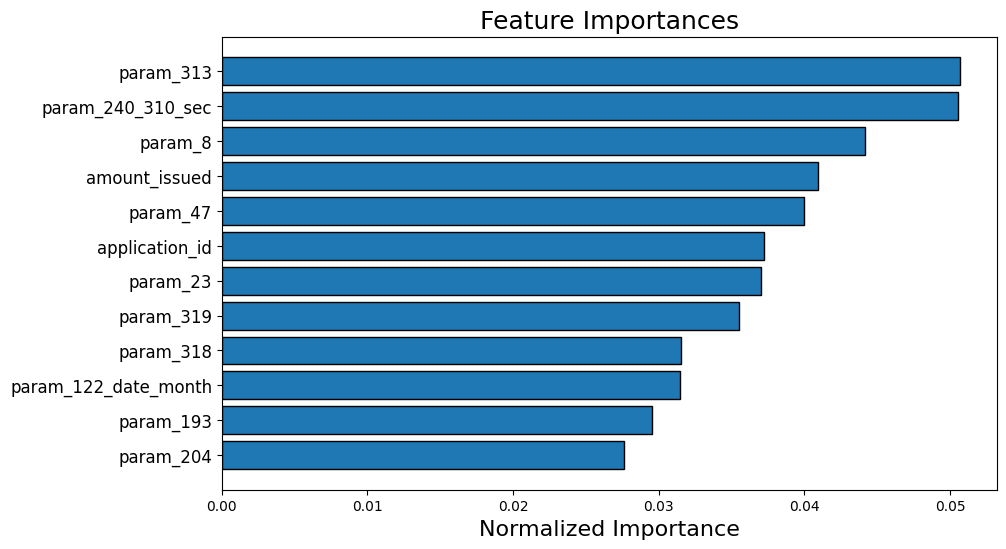

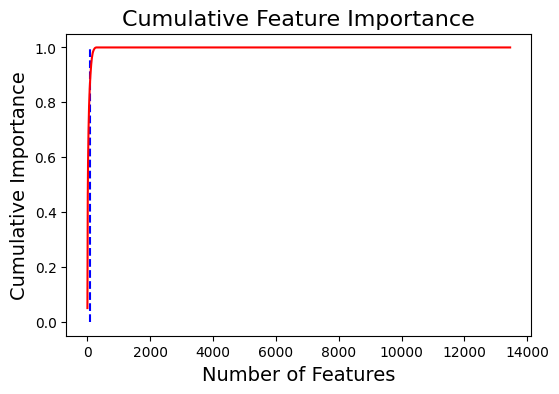

98 features required for 0.90 of cumulative importance


In [67]:
fs.plot_feature_importances(threshold = 0.9, plot_n = 12)

Исходя из важности признака, есть подозрение, что разница в секундах - есть некоторый "Фродовый признак"

In [68]:
fs.feature_importances.head(10)

,feature,importance,normalized_importance,cumulative_importance
0,param_313,81.50,0.050684,0.050684
1,param_240_310_sec,81.30,0.050560,0.101244
2,param_8,71.05,0.044185,0.145429
3,amount_issued,65.85,0.040951,0.186381
4,param_47,64.25,0.039956,0.226337
5,application_id,59.85,0.037220,0.263557
6,param_23,59.55,0.037034,0.300591
7,param_319,57.05,0.035479,0.336070
8,param_318,50.70,0.031530,0.367600
9,param_122_date_month,50.60,0.031468,0.399067


In [69]:
fs.identify_low_importance(cumulative_importance = 0.85)

74 features required for cumulative importance of 0.85 after one hot encoding.
13383 features do not contribute to cumulative importance of 0.85.



In [70]:
fs.identify_single_unique()

1 features with a single unique value.



In [71]:
X_train = fs.remove(methods = 'all', keep_one_hot=False)

['missing', 'collinear', 'single_unique', 'zero_importance', 'low_importance'] methods have been run

Removed 13420 features including one-hot features.


In [72]:
X_train.shape

(6217, 98)

In [73]:
data.shape

(6217, 149)

In [74]:
X_train.head(5)

,application_id,application_week_created,loan_week_created,amount_issued,param_1,param_2,param_6,param_7,param_8,param_9,param_13,param_16,param_21,param_23,param_47,param_48,param_74,param_84,param_87,param_94,param_109,param_110,param_113,param_114,param_115,param_116,param_128,param_129,param_130,param_131,param_132,param_148,param_149,param_156,param_157,param_158,param_161,param_162,param_163,param_185,param_186,param_188,param_191,param_192,param_193,param_196,param_201,param_203,param_204,param_214,param_222,param_225,param_226,param_227,param_228,param_229,param_236,param_245,param_246,param_247,param_248,param_253,param_254,param_260,param_261,param_266,param_267,param_268,param_270,param_271,param_272,param_273,param_274,param_275,param_276,param_277,param_278,param_289,param_290,param_291,param_292,param_293,param_294,param_295,param_305,param_306,param_313,param_318,param_319,loan_application_days,application_date_dayofweek,param_240_310_sec,param_122_date_month,param_122_date_day,param_122_date_dayofweek,param_210_date_month,param_210_date_day,param_210_date_dayofweek
0,453055,48,49,1000000,Asia/Bangkok,0,2,2,15000000.0,4000000,0,0,0,1.0,25,N,1.0,0.0,0.0,0.0,Ha Noi,Hanoi,Viettel Group,viettel.com.vn,Viettel Mobile,ISP/MOB,Mobile Phone,Apple,iPhone,iPhone,Apple,24.0,NaN,vi-vn,iOS,14_2,Safari,14.0.1,WebKit,dns1.vietel.com.vn,203.113.131.1,100000,0.0,0.0,12.0,116.96.80.15,NaN,2,2,117.7.198.19,Viettel Mobile,True,False,NaN,False,False,False,0,True,gmail.com,.com,MarkMonitor Inc.,Google LLC,True,False,0,True,True,True,False,True,True,False,False,False,False,True,False,NaN,True,False,False,False,True,True,True,0.940,NaN,NaN,3,5,1.630,2.0,28.0,2.0,9.0,30.0,3.0
1,454384,48,49,600000,Asia/Ho_Chi_Minh,1,2,2,7000000.0,4000000,0,0,0,52.0,21,N,0.0,0.0,0.0,1.0,Dong Nai,Bien Hoa,Vietnam Posts and Telecommunications Group,vnpt.com.vn,Vinaphone,ISP/MOB,Mobile Phone,Samsung,SM-A705F,Galaxy A70,Samsung,24.0,4.0,vi-VN|en-US,Android,10,Chrome Mobile,87.0.4280.66,WebKit,vnpt.vn,113.164.235.121,820000,1.0,0.0,2.0,113.185.73.255,8.0,0,0,113.185.85.169,Vinaphone,True,True,False,False,False,NaN,1,True,gmail.com,.com,MarkMonitor Inc.,Google LLC,True,False,0,True,True,NaN,False,False,False,False,False,False,NaN,False,False,False,False,False,False,False,NaN,False,NaN,0.940,NaN,NaN,2,6,3.247,11.0,30.0,3.0,NaN,NaN,NaN
2,454971,48,49,800000,Asia/Ho_Chi_Minh,0,2,2,10000000.0,4000000,1,0,0,11.0,37,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3,1.55.117.172,MobiFone,True,True,False,False,False,NaN,1,True,gmail.com,.com,MarkMonitor Inc.,Google LLC,True,False,0,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.887,NaN,1.0,2,6,2.688,NaN,NaN,NaN,12.0,31.0,3.0
3,455036,48,49,800000,Asia/Ho_Chi_Minh,5,1,2,13000000.0,4000000,0,0,0,48.0,28,N,0.0,0.0,0.0,1.0,Ha Noi,Hanoi,Vietnam Posts and Telecommunications Group,vnpt.com.vn,Vinaphone,ISP/MOB,Mobile Phone,Oppo,CPH1905,A7,Oppo,24.0,4.0,vi-VN|en-US,Android,8.1.0,Chrome Mobile,86.0.4240.198,WebKit,vnpt.vn,113.164.235.121,100000,0.0,0.0,NaN,113.185.86.146,8.0,4,4,113.185.86.146,MobiFone,True,True,False,NaN,False,NaN,1,True,gmail.com,.com,MarkMonitor Inc.,Google LLC,True,False,1,True,True,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.940,NaN,NaN,2,6,1.680,11.0,30.0,3.0,NaN,NaN,NaN
4,455152,48,49,1000000,Asia/Bangkok,0,2,2,15000000.0,4000000,0,0,0,3.0,39,N,0.0,0.0,0.0,0.0,Bac Ninh,Bac Ninh,FPT Telecom,fpt.com.vn,-,ISP,Mobile Phone,Apple,iPhone,iPhone,Apple,24.0,NaN,vi,iOS,13_6_1,Safari,13.1.2,WebKit,ns1.zonedns.vn,103.28.36.30,220000,0.0,0.0,2.0,113.23.105.70,NaN,3,3,113.23.105.70,Viettel,True,True,True,False,False,NaN,0,True,gmail.com,.com,MarkMonitor Inc.,Google LLC,True,False,0,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,True,True,True,0.901,4.0,4.

In [75]:
columns_selected = list(X_train.columns) + ['risk_event']

In [76]:
data = data[columns_selected].copy()

In [77]:
# выделим категориальные признаки
cat_features = list(data.nunique()[data.nunique()<12].index)

In [78]:
data[cat_features].head(5)

,application_week_created,loan_week_created,amount_issued,param_1,param_6,param_7,param_21,param_48,param_74,param_84,param_94,param_115,param_116,param_128,param_148,param_149,param_157,param_161,param_163,param_192,param_201,param_204,param_222,param_225,param_226,param_227,param_228,param_229,param_236,param_246,param_248,param_260,param_261,param_266,param_267,param_268,param_270,param_271,param_272,param_273,param_274,param_275,param_276,param_277,param_278,param_289,param_290,param_291,param_292,param_293,param_294,param_295,param_305,param_306,loan_application_days,application_date_dayofweek,param_122_date_day,param_122_date_dayofweek,param_210_date_dayofweek,risk_event
0,48,49,1000000,Asia/Bangkok,2,2,0,N,1.0,0.0,0.0,Viettel Mobile,ISP/MOB,Mobile Phone,24.0,NaN,iOS,Safari,WebKit,0.0,NaN,2,Viettel Mobile,True,False,NaN,False,False,False,True,.com,True,False,0,True,True,True,False,True,True,False,False,False,False,True,False,NaN,True,False,False,False,True,True,True,3,5,28.0,2.0,3.0,0
1,48,49,600000,Asia/Ho_Chi_Minh,2,2,0,N,0.0,0.0,1.0,Vinaphone,ISP/MOB,Mobile Phone,24.0,4.0,Android,Chrome Mobile,WebKit,0.0,8.0,0,Vinaphone,True,True,False,False,False,NaN,True,.com,True,False,0,True,True,NaN,False,False,False,False,False,False,NaN,False,False,False,False,False,False,False,NaN,False,NaN,2,6,30.0,3.0,NaN,1
2,48,49,800000,Asia/Ho_Chi_Minh,2,2,0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,MobiFone,True,True,False,False,False,NaN,True,.com,True,False,0,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2,6,NaN,NaN,3.0,0
3,48,49,800000,Asia/Ho_Chi_Minh,1,2,0,N,0.0,0.0,1.0,Vinaphone,ISP/MOB,Mobile Phone,24.0,4.0,Android,Chrome Mobile,WebKit,0.0,8.0,4,MobiFone,True,True,False,NaN,False,NaN,True,.com,True,False,1,True,True,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2,6,30.0,3.0,NaN,0
4,48,49,1000000,Asia/Bangkok,2,2,0,N,0.0,0.0,0.0,-,ISP,Mobile Phone,24.0,NaN,iOS,Safari,WebKit,0.0,NaN,3,Viettel,True,True,True,False,False,NaN,True,.com,True,False,0,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,True,True,True,2,6,30.0,1.0,4.0,0


In [79]:
list_objects = list(data[cat_features].dtypes.loc[data[cat_features].dtypes=='object'].index)
list_objects

['application_week_created',
 'loan_week_created',
 'param_1',
 'param_48',
 'param_115',
 'param_116',
 'param_128',
 'param_157',
 'param_161',
 'param_163',
 'param_222',
 'param_225',
 'param_226',
 'param_227',
 'param_228',
 'param_229',
 'param_236',
 'param_246',
 'param_248',
 'param_260',
 'param_261',
 'param_267',
 'param_268',
 'param_270',
 'param_271',
 'param_272',
 'param_273',
 'param_274',
 'param_275',
 'param_276',
 'param_277',
 'param_278',
 'param_289',
 'param_290',
 'param_291',
 'param_292',
 'param_293',
 'param_294',
 'param_295',
 'param_305',
 'param_306']

In [80]:
data[list_objects]

,application_week_created,loan_week_created,param_1,param_48,param_115,param_116,param_128,param_157,param_161,param_163,param_222,param_225,param_226,param_227,param_228,param_229,param_236,param_246,param_248,param_260,param_261,param_267,param_268,param_270,param_271,param_272,param_273,param_274,param_275,param_276,param_277,param_278,param_289,param_290,param_291,param_292,param_293,param_294,param_295,param_305,param_306
0,48,49,Asia/Bangkok,N,Viettel Mobile,ISP/MOB,Mobile Phone,iOS,Safari,WebKit,Viettel Mobile,True,False,NaN,False,False,False,True,.com,True,False,True,True,True,False,True,True,False,False,False,False,True,False,NaN,True,False,False,False,True,True,True
1,48,49,Asia/Ho_Chi_Minh,N,Vinaphone,ISP/MOB,Mobile Phone,Android,Chrome Mobile,WebKit,Vinaphone,True,True,False,False,False,NaN,True,.com,True,False,True,True,NaN,False,False,False,False,False,False,NaN,False,False,False,False,False,False,False,NaN,False,NaN
2,48,49,Asia/Ho_Chi_Minh,N,NaN,NaN,NaN,NaN,NaN,NaN,MobiFone,True,True,False,False,False,NaN,True,.com,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,48,49,Asia/Ho_Chi_Minh,N,Vinaphone,ISP/MOB,Mobile Phone,Android,Chrome Mobile,WebKit,MobiFone,True,True,False,NaN,False,NaN,True,.com,True,False,True,True,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,48,49,Asia/Bangkok,N,-,ISP,Mobile Phone,iOS,Safari,WebKit,Viettel,True,True,True,False,False,NaN,True,.com,True,False,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6212,52,52,Asia/Bangkok,N,Viettel Mobile,ISP/MOB,Mobile Phone,Android,Chrome Mobile,WebKit,Viettel,True,True,True,False,False,False,True,.com,True,False,False,True,True,True,False,False,False,False,False,False,False,False,NaN,False,NaN,False,False,True,False,False
6213,52,52,Asia/Bangkok,N,Vinaphone,ISP/MOB,Mobile Phone,Android,Chrome Mobile,WebKit,MobiFone,True,True,NaN,False,False,False,True,.com,True,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,NaN,False,False,False,False,False
6214,52,52,Asia/Bangkok,N,-,ISP,Desktop,OS X,Safari,WebKit,Viettel,True,False,False,True,True,NaN,True,.com,True,False,False,True,True,True,False,NaN,False,False,False,True,NaN,False,False,False,False,NaN,False,False,False,False
6215,52,52,Asia/Bangkok,N,-,ISP,Desktop,OS X,Chrome,WebKit,Vinaphone,True,False,True,False,False,NaN,True,.com,True,False,True,True,True,False,True,False,False,False,True,False,False,False,NaN,False,False,False,False,True,False,True


In [81]:
set(data[cat_features].dtypes)

{dtype('int64'), dtype('float64'), dtype('O')}

In [82]:
# целочисленные
data['application_week_created'] = data['application_week_created'].astype('int32').copy()
data['loan_week_created'] = data['loan_week_created'].astype('int32').copy()

In [83]:
# string

string_params = ['param_1',
                 'param_115',
                 'param_116',
                 'param_128',
                 'param_157',
                 'param_161',
                 'param_163',
                 'param_222',
                 'param_248']

for s in string_params: 
    data[s] = data[s].astype('string')

In [84]:
# boolean параметры
boolean_params = ['param_225',
                 'param_226',
                 'param_227',
                 'param_228',
                 'param_229',
                 'param_236',
                 'param_246',
                 'param_260',
                 'param_261',
                 'param_267',
                 'param_268',
                 'param_270',
                 'param_271',
                 'param_272',
                 'param_273',
                 'param_274',
                 'param_275',
                 'param_276',
                 'param_277',
                 'param_278',
                 'param_289',
                 'param_290',
                 'param_291',
                 'param_292',
                 'param_293',
                 'param_294',
                 'param_295',
                 'param_305',
                 'param_306']

for b in boolean_params: 
    data[b] = data[b].astype(float)

In [85]:
set(data[cat_features].dtypes)

{dtype('float64'), dtype('int32'), dtype('int64'), dtype('O'), StringDtype}

In [86]:
# оставшиеся строковые данные, которые не отнесли к категориальным при помощи фильтров

tmp = list(data.dtypes.loc[data.dtypes=='object'].index)
data[tmp] = data[tmp].astype('string').copy()

Выделим бинарные признаки  
Найдем из них средние


## Бинарные признаки

In [87]:
data.nunique()[data.nunique()==2].index

Index(['param_6', 'param_7', 'param_21', 'param_48', 'param_74', 'param_84',
       'param_94', 'param_225', 'param_226', 'param_227', 'param_228',
       'param_229', 'param_236', 'param_246', 'param_260', 'param_261',
       'param_266', 'param_267', 'param_268', 'param_270', 'param_271',
       'param_272', 'param_273', 'param_274', 'param_275', 'param_276',
       'param_277', 'param_278', 'param_289', 'param_290', 'param_291',
       'param_292', 'param_293', 'param_294', 'param_295', 'param_305',
       'param_306', 'risk_event'],
      dtype='object')

In [91]:
param_binary = ['param_6', 'param_7', 'param_21', 'param_48', 'param_74', 'param_84',
               'param_94', 'param_225', 'param_226', 'param_227', 'param_228',
               'param_229', 'param_236', 'param_246', 'param_260', 'param_261',
               'param_266', 'param_267', 'param_268', 'param_270', 'param_271',
               'param_272', 'param_273', 'param_274', 'param_275', 'param_276',
               'param_277', 'param_278', 'param_289', 'param_290', 'param_291',
               'param_292', 'param_293', 'param_294', 'param_295', 'param_305',
               'param_306']

In [93]:
data[param_binary] = data[param_binary].fillna(0.5).astype(int).copy()

In [ ]:
set(data[param_binary].dtypes) # все ок

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_sc = scaler.fit_transform(data[param_binary])
data_sc

In [ ]:
data['binary_mean'] = data_sc.mean(axis=1)

In [ ]:
data.shape

In [ ]:
set(data.dtypes)

In [ ]:
data.dtypes

## Сделаем labelEncoder для строковых типов данных

In [ ]:
string_params = list(data.dtypes.loc[data.dtypes=='string'].index)

In [ ]:
# убедимся
data[string_params] = data[string_params].astype('string').copy()

In [ ]:
# заполним -1 все пропуска, чтобы можно было сделать labelEncoder
data[string_params] = data[string_params].fillna('0.5').copy()

In [ ]:
from sklearn import preprocessing

In [ ]:
for i in string_params:
    le = preprocessing.LabelEncoder()
    tmp = le.fit_transform(data[i])
    data[i] = tmp

In [ ]:
set(data.dtypes)

In [ ]:
data

In [ ]:
data['param_240_310_sec']

In [ ]:
# сохраняем подготовленные данные
#data.to_csv('data_prepare.csv', index=False)

## Проверим подозрительный признак

In [94]:
# читаем файл, полученный отбором и трансформацией выше
data = pd.read_csv('data_prepare.csv')

In [95]:
tmp = data.loc[data['risk_event']==1].copy()

In [96]:
tmp1 = data.loc[data['risk_event']==0].copy()

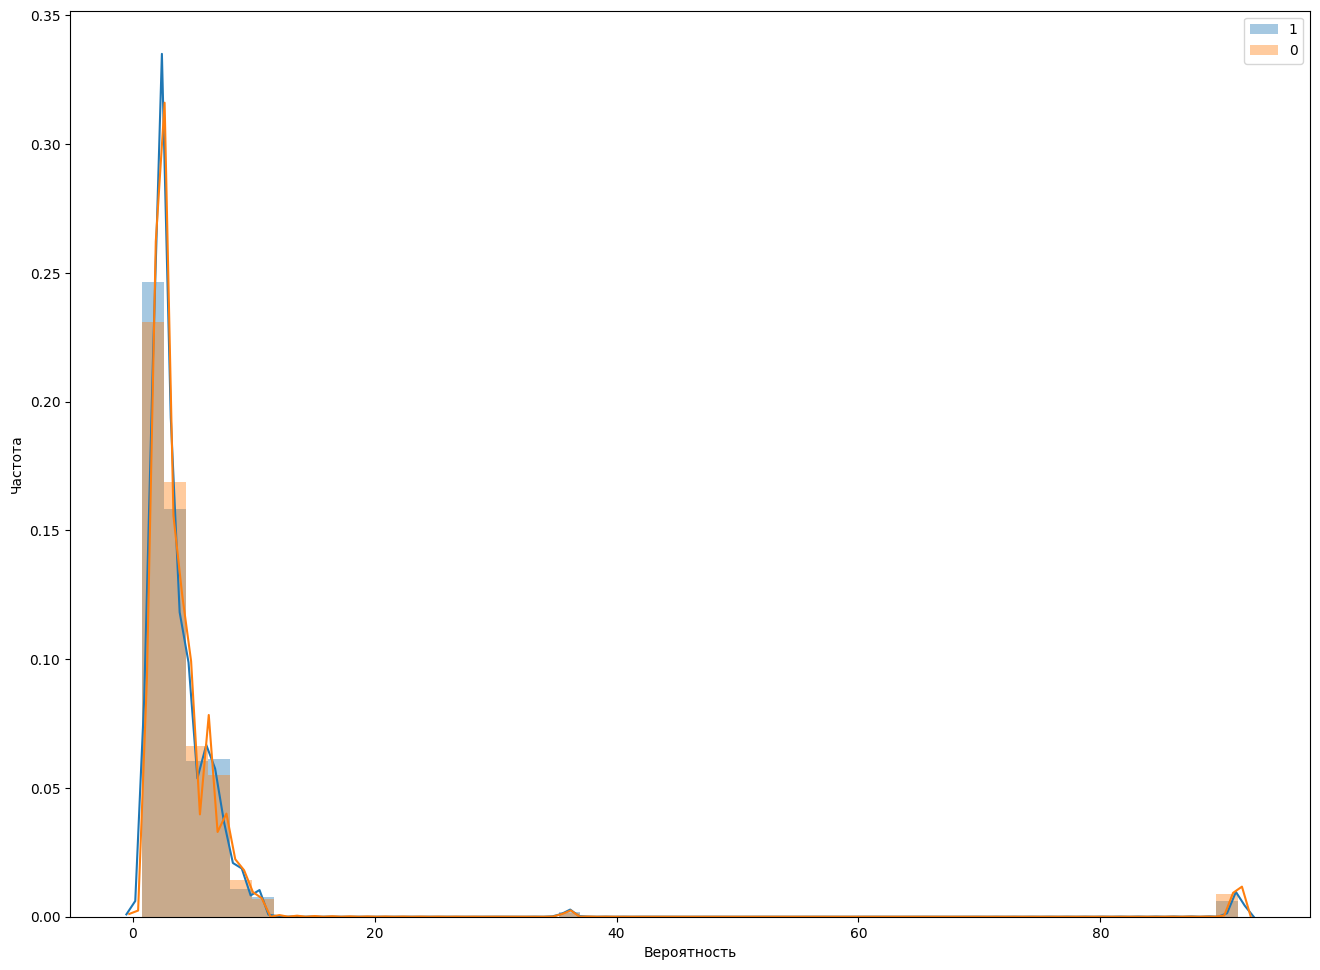

In [97]:
plt.figure(figsize=(16, 12))
sns.distplot(tmp['param_240_310_sec'], label='1', norm_hist=True)
sns.distplot(tmp1['param_240_310_sec'], label='0', norm_hist=True)
#sns.distplot(equi_retro_f['score1']/1000, label='Эквифакс', norm_hist=True)
#sns.distplot(qiwi_retro_f['pd_mfo_v2_3'], label='Qiwi', norm_hist=True)
plt.xlabel('Вероятность')
plt.ylabel('Частота')
plt.legend()

## А вот здесь воспользуемся AutoML 

In [98]:
data

,application_id,application_week_created,loan_week_created,amount_issued,param_1,param_2,param_6,param_7,param_8,param_9,param_13,param_16,param_21,param_23,param_47,param_48,param_74,param_84,param_87,param_94,param_109,param_110,param_113,param_114,param_115,param_116,param_128,param_129,param_130,param_131,param_132,param_148,param_149,param_156,param_157,param_158,param_161,param_162,param_163,param_185,param_186,param_188,param_191,param_192,param_193,param_196,param_198,param_201,param_203,param_204,param_214,param_222,param_225,param_226,param_227,param_228,param_229,param_236,param_245,param_246,param_247,param_248,param_253,param_254,param_260,param_261,param_266,param_267,param_268,param_270,param_271,param_272,param_273,param_274,param_275,param_276,param_277,param_278,param_289,param_290,param_291,param_292,param_293,param_294,param_295,param_305,param_306,param_313,param_318,param_319,loan_application_days,application_date_dayofweek,param_240_310_sec,param_122_date_month,param_122_date_day,param_122_date_dayofweek,param_210_date_month,param_210_date_day,param_210_date_dayofweek,risk_event,binary_mean
0,453055,48,49,1000000,1,0,2,2,15000000.0,4000000,0,0,0,1.0,25,0,1,0,0.0,0,24,50,28,14,4,2,2,2,405,303,2,24.0,NaN,90,7,54,9,35,3,2,12,3,0.0,0.0,12.0,1737,0,NaN,2,2,2042,3,1,0,-1,0,0,0,0,1,7,1,9,4,1,0,0,1,1,1,0,1,1,0,0,0,0,1,0,-1,1,0,0,0,1,1,1,0.940,NaN,NaN,3,5,1.630,2.0,28.0,2.0,9.0,30.0,3.0,0,0.662162
1,454384,48,49,600000,2,1,2,2,7000000.0,4000000,0,0,0,52.0,21,0,0,0,0.0,1,19,9,24,16,5,2,2,33,253,91,19,24.0,4.0,36,1,1,2,155,3,20,4,50,1.0,0.0,2.0,1099,0,8.0,0,0,1237,4,1,1,0,0,0,-1,1,1,7,1,9,4,1,0,0,1,1,-1,0,0,0,0,0,0,-1,0,0,0,0,0,0,0,-1,0,-1,0.940,NaN,NaN,2,6,3.247,11.0,30.0,3.0,NaN,NaN,NaN,1,0.527027
2,454971,48,49,800000,2,0,2,2,10000000.0,4000000,1,0,0,11.0,37,0,-1,-1,NaN,-1,0,0,0,0,1,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0,1,NaN,NaN,NaN,0,-1,NaN,3,3,223,0,1,1,0,0,0,-1,1,1,7,1,9,4,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.887,NaN,1.0,2,6,2.688,NaN,NaN,NaN,12.0,31.0,3.0,0,0.513514
3,455036,48,49,800000,2,5,1,2,13000000.0,4000000,0,0,0,48.0,28,0,0,0,0.0,1,24,50,24,16,5,2,2,25,71,33,15,24.0,4.0,36,1,66,2,149,3,20,4,3,0.0,0.0,NaN,1208,0,8.0,4,4,1268,0,1,1,0,-1,0,-1,1,1,7,1,9,4,1,0,1,1,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.940,NaN,NaN,2,6,1.680,11.0,30.0,3.0,NaN,NaN,NaN,0,0.554054
4,455152,48,49,1000000,1,0,2,2,15000000.0,4000000,0,0,0,3.0,39,0,0,0,0.0,0,6,6,12,4,0,1,2,2,405,303,2,24.0,NaN,23,7,49,9,32,3,13,2,8,0.0,0.0,2.0,1316,0,NaN,3,3,1418,2,1,1,1,0,0,-1,0,1,7,1,9,4,1,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0.901,4.0,4.0,2,6,3.078,6.0,30.0,1.0,12.0,31.0,4.0,0,0.675676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6212,521834,52,52,200000,1,0,2,2,9000000.0,4000000,0,0,0,4.0,26,0,0,0,1.0,0,43,114,28,14,4,2,2,31,19,0,27,24.0,2.0,36,1,67,2,153,3,2,12,15,1.0,1.0,NaN,3247,1,8.0,0,0,3534,2,1,1,1,0,0,0,1,1,7,1,9,4,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,-1,0,-1,0,0,1,0,0,0.940,NaN,2.0,0,1,2.480,8.0,31.0,5.0,NaN,NaN,NaN,1,0.608108
6213,521835,52,52,700000,1,4,2,1,8000000.0,4000000,0,0,0,50.0,47,0,1,0,39.0,0,25,46,24,16,5,2,2,25,70,33,15,24.0,2.0,57,1,66,2,153,3,20,4,30,0.0,0.0,5.0,946,0,8.0,3,3,1063,0,1,1,-1,0,0,0,1,1,7,1,9,4,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,-1,0,0,0,0,0,0.927,3.0,8.0,0,1,2.480,9.0,30.0,2.0,NaN,NaN,NaN,0,0.581081
6214,521877,52,52,200000,1,0,1,2,NaN,1000000,0,3,1,NaN,32,0,0,1,0.0,0,24,50,13,4,0,1,1,2,378,0,2,NaN,NaN,23,3,6,9,32,3,13,2,3,0.0,0.0,NaN,5397,0,NaN,1,1,2122,2,1,0,0,1,1,-1,1,1,7,1,9,4,1,0,0,0,1,1,1,0,-1,0,0,0,1,-1,0,0,0,0,-1,0,0,0,0,0.963,11.0,25.0,0,1,2.476,8.0,31.0,5.0,NaN,NaN,NaN,0,0.581081
6215,521903,52,52,500000,1,0,2,1,10000000.0,400000

## AutoWOE - Baseline

[AutoWoE](https://github.com/sberbank-ai-lab/AutoMLWhitebox)

In [99]:
# ! pip install autowoe

In [100]:
import pandas as pd
import numpy as np
import lightgbm as lgb

from collections import OrderedDict
from sklearn.metrics import roc_auc_score
from tqdm import tqdm
from copy import deepcopy

from autowoe import ReportDeco, AutoWoE

In [101]:
y = data['risk_event'].copy()
X = data.copy()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                    random_state = 42, stratify = y)

In [102]:
auto_woe = AutoWoE(interpreted_model=True,
                     monotonic=False,
                     max_bin_count=5,
                     select_type=None,
                     pearson_th=0.9,
                     auc_th=.505,
                     vif_th=10.,
                     imp_th=0,
                     th_const=32,
                     force_single_split=True,
                     th_nan=0.01,
                     th_cat=0.005,
                     woe_diff_th=0.01,
                     min_bin_size=0.01,
                     min_bin_mults=(2, 4),
                     min_gains_to_split=(0.0, 0.5, 1.0),
                     auc_tol=1e-4,
                     cat_alpha=100,
                     cat_merge_to="to_woe_0",
                     nan_merge_to="to_woe_0",
                     oof_woe=True,
                     n_folds=6,
                     n_jobs=-1,
                     l1_grid_size=50,
                     l1_exp_scale=6,
                     imp_type="feature_imp",
                     regularized_refit=False,
                     p_val=0.05,
                     debug=False,
                     verbose=1
        )

auto_woe = ReportDeco(auto_woe)

In [103]:
auto_woe.fit(X_train, 
             target_name="risk_event",
             #features_type=features_type,
             group_kf=None,
             #max_bin_count=max_bin_count,
             #features_monotone_constraints=features_monotone_constraints,
             validation=X_test
            )

In [104]:
pred = auto_woe.predict_proba(X_test)
Gini_test = 2 * roc_auc_score(X_test['risk_event'], pred) - 1 
print('Gini_test:', Gini_test)

Gini_test: 0.2703414985057968


In [105]:
pred = auto_woe.predict_proba(X_train)
Gini_train = 2 * roc_auc_score(X_train['risk_event'], pred) - 1
print('Gini_train:', Gini_train)

Gini_train: 0.29470917818353004


## Еще пара методов фильтрации признаков

In [106]:
data.shape

(6217, 101)

* Chi-square для категориальных признаков  
* ANOVA F-statistic for numerical features

### Категориальные признаки

In [107]:
cat_features = ['application_week_created',
                 'loan_week_created',
                 'amount_issued',
                 'param_1',
                 'param_6',
                 'param_7',
                 'param_21',
                 'param_48',
                 'param_74',
                 'param_84',
                 'param_94',
                 'param_115',
                 'param_116',
                 'param_128',
                 'param_148',
                 'param_149',
                 'param_157',
                 'param_161',
                 'param_163',
                 'param_192',
                 'param_198',
                 'param_201',
                 'param_204',
                 'param_222',
                 'param_225',
                 'param_226',
                 'param_227',
                 'param_228',
                 'param_229',
                 'param_236',
                 'param_246',
                 'param_248',
                 'param_260',
                 'param_261',
                 'param_266',
                 'param_267',
                 'param_268',
                 'param_270',
                 'param_271',
                 'param_272',
                 'param_273',
                 'param_274',
                 'param_275',
                 'param_276',
                 'param_277',
                 'param_278',
                 'param_289',
                 'param_290',
                 'param_291',
                 'param_292',
                 'param_293',
                 'param_294',
                 'param_295',
                 'param_305',
                 'param_306',
                 'loan_application_days',
                 'application_date_dayofweek',
                 'param_122_date_day',
                 'param_122_date_dayofweek',
                 'param_210_date_dayofweek']

In [108]:
data[cat_features].describe()

,application_week_created,loan_week_created,amount_issued,param_1,param_6,param_7,param_21,param_48,param_74,param_84,param_94,param_115,param_116,param_128,param_148,param_149,param_157,param_161,param_163,param_192,param_198,param_201,param_204,param_222,param_225,param_226,param_227,param_228,param_229,param_236,param_246,param_248,param_260,param_261,param_266,param_267,param_268,param_270,param_271,param_272,param_273,param_274,param_275,param_276,param_277,param_278,param_289,param_290,param_291,param_292,param_293,param_294,param_295,param_305,param_306,loan_application_days,application_date_dayofweek,param_122_date_day,param_122_date_dayofweek,param_210_date_dayofweek
count,6217.000000,6217.000000,6.217000e+03,6217.000000,6217.000000,6217.000000,6217.000000,6217.000000,6217.000000,6217.000000,6217.000000,6217.000000,6217.000000,6217.000000,5258.000000,2816.000000,6217.000000,6217.000000,6217.000000,5135.000000,6217.000000,2842.000000,6217.000000,6217.000000,6217.000000,6217.000000,6217.000000,6217.000000,6217.000000,6217.000000,6217.000000,6217.000000,6217.000000,6217.000000,6217.000000,6217.000000,6217.000000,6217.000000,6217.000000,6217.000000,6217.000000,6217.000000,6217.000000,6217.000000,6217.000000,6217.000000,6217.000000,6217.000000,6217.000000,6217.000000,6217.000000,6217.000000,6217.000000,6217.000000,6217.000000,6217.000000,6217.000000,5601.000000,5601.000000,2867.000000
mean,50.025736,50.043912,5.523243e+05,1.445070,1.388612,1.828856,0.385877,0.103909,0.121763,0.178704,0.144121,3.184655,1.707415,1.771594,24.287562,4.067472,3.668972,5.148946,2.640502,0.095229,0.058871,7.564391,1.183529,2.205083,0.890783,0.820492,0.115811,-0.012707,0.130288,-0.477401,0.969921,1.008525,0.983111,0.008364,0.311404,0.566189,0.885797,0.284703,0.109860,0.276661,0.066431,-0.063857,0.008042,0.092810,-0.139135,0.014316,-0.066431,-0.392311,-0.040695,-0.142512,-0.116133,-0.013672,0.170661,0.061605,0.157311,0.077369,2.873412,30.413319,2.905910,2.891873
std,0.935146,0.943293,2.538852e+05,0.580891,0.487474,0.376665,0.486841,0.305167,0.551531,0.586537,0.566218,1.826007,0.735301,0.615604,1.779836,1.950286,3.048375,3.724378,0.941288,0.350978,0.502640,1.358447,1.409975,1.333867,0.408020,0.433787,0.611007,0.498711,0.397965,0.594521,0.212001,0.160712,0.172622,0.176465,0.463105,0.582484,0.432532,0.648738,0.352406,0.477981,0.340235,0.255458,0.193856,0.352744,0.486075,0.211375,0.297340,0.503232,0.260155,0.361369,0.324402,0.147827,0.523872,0.464541,0.490605,0.338866,1.969988,0.642841,1.916163,1.557289
min,48.000000,49.000000,1.000000e+05,0.000000,1.000000,1.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,28.000000,0.000000,0.000000
25%,49.000000,49.000000,3.000000e+05,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,24.000000,2.000000,1.000000,2.000000,3.000000,0.000000,0.000000,8.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,30.000000,1.000000,2.000000
50%,50.000000,50.000000,5.000000e+05,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2.000000,2.000000,24.000000,4.000000,1.000000,2.000000,3.000000,0.000000,0.000000,8.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1

In [109]:
data[cat_features].describe().loc['min']

application_week_created          48.0
loan_week_created                 49.0
amount_issued                 100000.0
param_1                            0.0
param_6                            1.0
param_7                            1.0
param_21                           0.0
param_48                           0.0
param_74                          -1.0
param_84                          -1.0
param_94                          -1.0
param_115                          0.0
param_116                          0.0
param_128                          0.0
param_148                         16.0
param_149                          1.0
param_157                          0.0
param_161                          0.0
param_163                          0.0
param_192                          0.0
param_198                         -1.0
param_201                          1.0
param_204                         -1.0
param_222                          0.0
param_225                         -1.0
param_226                

In [110]:
data[cat_features] = data[cat_features] + 1

In [111]:
data[cat_features].describe().loc['min']

application_week_created          49.0
loan_week_created                 50.0
amount_issued                 100001.0
param_1                            1.0
param_6                            2.0
param_7                            2.0
param_21                           1.0
param_48                           1.0
param_74                           0.0
param_84                           0.0
param_94                           0.0
param_115                          1.0
param_116                          1.0
param_128                          1.0
param_148                         17.0
param_149                          2.0
param_157                          1.0
param_161                          1.0
param_163                          1.0
param_192                          1.0
param_198                          0.0
param_201                          2.0
param_204                          0.0
param_222                          1.0
param_225                          0.0
param_226                

In [112]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [113]:
# есть отрицательное значение
data.groupby('param_204').size()

param_204
0     655
1    1418
2    1890
3    1175
4     689
5     273
6      92
7      21
8       4
dtype: int64

In [114]:
#data['param_204'] = np.array(data['param_204']+1) # заменим его

In [115]:
len(cat_features)

60

In [116]:
# instantiate SelectKBest class to select the best 4 features
# use score_func=mutual_info_classif for Mutual Information
# Use k='all' to see the scores for all features
fs = SelectKBest(score_func=chi2, k=30)

# fit on training features and target
fs.fit(data[cat_features].fillna(0.5), y)

SelectKBest(k=30, score_func=<function chi2 at 0x00000177E8B28310>)

In [117]:
# transform training and test features and convert to DFs. These will be fed to the ML algorithm for model training
X_train_fs = pd.DataFrame(fs.transform(data[cat_features].fillna(0.5)), columns = data[cat_features].columns[fs.get_support()])

In [118]:
cat_params_selected = list(X_train_fs.columns)
cat_params_selected

['amount_issued',
 'param_1',
 'param_6',
 'param_7',
 'param_21',
 'param_94',
 'param_115',
 'param_116',
 'param_128',
 'param_148',
 'param_149',
 'param_161',
 'param_163',
 'param_192',
 'param_198',
 'param_201',
 'param_204',
 'param_227',
 'param_228',
 'param_229',
 'param_272',
 'param_273',
 'param_293',
 'param_295',
 'param_305',
 'loan_application_days',
 'application_date_dayofweek',
 'param_122_date_day',
 'param_122_date_dayofweek',
 'param_210_date_dayofweek']

### Числовые признаки

* ANOVA-f Statistic.
* Mutual Information Statistics.

In [119]:
numeric_features = list(data.nunique()[data.nunique()>11].index)
len(numeric_features)

40

In [120]:
from sklearn.feature_selection import mutual_info_classif

In [121]:
# instantiate SelectKBest class to select the best 4 features
# use score_func=mutual_info_classif for Mutual Information
# Use k='all' to see the scores for all features
fs = SelectKBest(score_func=mutual_info_classif, k=25)

# fit on training features and target
fs.fit(data[numeric_features].fillna(data[numeric_features].mean()), y)

SelectKBest(k=25,
            score_func=<function mutual_info_classif at 0x00000177E838EC10>)

In [122]:
# transform training and test features and convert to DFs. These will be fed to the ML algorithm for model training
X_train_fs = pd.DataFrame(fs.transform(data[numeric_features].fillna(data[numeric_features].mean())),
                          columns = data[numeric_features].columns[fs.get_support()])

In [123]:
numeric_params_selected = list(X_train_fs.columns)
numeric_params_selected

['param_2',
 'param_8',
 'param_9',
 'param_23',
 'param_87',
 'param_110',
 'param_113',
 'param_114',
 'param_129',
 'param_130',
 'param_131',
 'param_132',
 'param_156',
 'param_185',
 'param_188',
 'param_193',
 'param_196',
 'param_203',
 'param_214',
 'param_254',
 'param_313',
 'param_318',
 'param_319',
 'param_122_date_month',
 'param_210_date_month']

In [124]:
selected_params = cat_params_selected + numeric_params_selected + ['risk_event']

In [125]:
data[selected_params]

,amount_issued,param_1,param_6,param_7,param_21,param_94,param_115,param_116,param_128,param_148,param_149,param_161,param_163,param_192,param_198,param_201,param_204,param_227,param_228,param_229,param_272,param_273,param_293,param_295,param_305,loan_application_days,application_date_dayofweek,param_122_date_day,param_122_date_dayofweek,param_210_date_dayofweek,param_2,param_8,param_9,param_23,param_87,param_110,param_113,param_114,param_129,param_130,param_131,param_132,param_156,param_185,param_188,param_193,param_196,param_203,param_214,param_254,param_313,param_318,param_319,param_122_date_month,param_210_date_month,risk_event
0,1000001,2,3,3,1,1,5,3,3,25.0,NaN,10,4,1.0,1,NaN,3,0,1,1,2,2,1,2,2,4,6,29.0,3.0,4.0,0,15000000.0,4000000,1.0,0.0,50,28,14,2,405,303,2,90,2,3,12.0,1737,2,2042,4,0.940,NaN,NaN,2.0,9.0,0
1,600001,3,3,3,1,2,6,3,3,25.0,5.0,3,4,1.0,1,9.0,1,1,1,1,1,1,1,0,1,3,7,31.0,4.0,NaN,1,7000000.0,4000000,52.0,0.0,9,24,16,33,253,91,19,36,20,50,2.0,1099,0,1237,4,0.940,NaN,NaN,11.0,NaN,1
2,800001,3,3,3,1,0,2,1,1,NaN,NaN,1,1,NaN,0,NaN,4,1,1,1,1,1,1,1,1,3,7,NaN,NaN,4.0,0,10000000.0,4000000,11.0,NaN,0,0,0,0,0,0,0,0,0,1,NaN,0,3,223,4,0.887,NaN,1.0,NaN,12.0,0
3,800001,3,2,3,1,2,6,3,3,25.0,5.0,3,4,1.0,1,9.0,5,1,0,1,1,1,1,1,1,3,7,31.0,4.0,NaN,5,13000000.0,4000000,48.0,0.0,50,24,16,25,71,33,15,36,20,3,NaN,1208,4,1268,4,0.940,NaN,NaN,11.0,NaN,0
4,1000001,2,3,3,1,1,1,2,3,25.0,NaN,10,4,1.0,1,NaN,4,2,1,1,2,2,1,2,2,3,7,31.0,2.0,5.0,0,15000000.0,4000000,3.0,0.0,6,12,4,2,405,303,2,23,13,8,2.0,1316,3,1418,4,0.901,4.0,4.0,6.0,12.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6212,200001,2,3,3,1,1,5,3,3,25.0,3.0,3,4,2.0,2,9.0,1,2,1,1,1,1,1,2,1,1,2,32.0,6.0,NaN,0,9000000.0,4000000,4.0,1.0,114,28,14,31,19,0,27,36,2,15,NaN,3247,0,3534,4,0.940,NaN,2.0,8.0,NaN,1
6213,700001,2,3,2,1,1,6,3,3,25.0,3.0,3,4,1.0,1,9.0,4,0,1,1,2,1,1,1,1,1,2,31.0,3.0,NaN,4,8000000.0,4000000,50.0,39.0,46,24,16,25,70,33,15,57,20,30,5.0,946,3,1063,4,0.927,3.0,8.0,9.0,NaN,0
6214,200001,2,2,3,2,1,1,2,2,NaN,NaN,10,4,1.0,1,NaN,2,1,2,2,1,0,0,1,1,1,2,32.0,6.0,NaN,0,NaN,1000000,NaN,0.0,50,13,4,2,378,0,2,23,13,3,NaN,5397,1,2122,4,0.963,11.0,25.0,8.0,NaN,0
6215,500001,2,3,2,1,1,1,2,2,NaN,9.0,2,4,1.0,1,5.0,0,2,1,1,2,1,1,2,1,1,2,32.0,5.0,NaN,0,10000000.0,4000000,11.0,1.0,50,15,7,12,98,0,2,57,20,3,1.0,4357,11,4829,4,0.940,NaN,NaN,8.0,NaN,0


In [126]:
data_selected = data[selected_params].copy()

In [127]:
data_selected.head(5)

,amount_issued,param_1,param_6,param_7,param_21,param_94,param_115,param_116,param_128,param_148,param_149,param_161,param_163,param_192,param_198,param_201,param_204,param_227,param_228,param_229,param_272,param_273,param_293,param_295,param_305,loan_application_days,application_date_dayofweek,param_122_date_day,param_122_date_dayofweek,param_210_date_dayofweek,param_2,param_8,param_9,param_23,param_87,param_110,param_113,param_114,param_129,param_130,param_131,param_132,param_156,param_185,param_188,param_193,param_196,param_203,param_214,param_254,param_313,param_318,param_319,param_122_date_month,param_210_date_month,risk_event
0,1000001,2,3,3,1,1,5,3,3,25.0,NaN,10,4,1.0,1,NaN,3,0,1,1,2,2,1,2,2,4,6,29.0,3.0,4.0,0,15000000.0,4000000,1.0,0.0,50,28,14,2,405,303,2,90,2,3,12.0,1737,2,2042,4,0.940,NaN,NaN,2.0,9.0,0
1,600001,3,3,3,1,2,6,3,3,25.0,5.0,3,4,1.0,1,9.0,1,1,1,1,1,1,1,0,1,3,7,31.0,4.0,NaN,1,7000000.0,4000000,52.0,0.0,9,24,16,33,253,91,19,36,20,50,2.0,1099,0,1237,4,0.940,NaN,NaN,11.0,NaN,1
2,800001,3,3,3,1,0,2,1,1,NaN,NaN,1,1,NaN,0,NaN,4,1,1,1,1,1,1,1,1,3,7,NaN,NaN,4.0,0,10000000.0,4000000,11.0,NaN,0,0,0,0,0,0,0,0,0,1,NaN,0,3,223,4,0.887,NaN,1.0,NaN,12.0,0
3,800001,3,2,3,1,2,6,3,3,25.0,5.0,3,4,1.0,1,9.0,5,1,0,1,1,1,1,1,1,3,7,31.0,4.0,NaN,5,13000000.0,4000000,48.0,0.0,50,24,16,25,71,33,15,36,20,3,NaN,1208,4,1268,4,0.940,NaN,NaN,11.0,NaN,0
4,1000001,2,3,3,1,1,1,2,3,25.0,NaN,10,4,1.0,1,NaN,4,2,1,1,2,2,1,2,2,3,7,31.0,2.0,5.0,0,15000000.0,4000000,3.0,0.0,6,12,4,2,405,303,2,23,13,8,2.0,1316,3,1418,4,0.901,4.0,4.0,6.0,12.0,0


## Baseline

In [128]:
from sklearn.preprocessing import MinMaxScaler

In [129]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc, classification_report 

In [130]:
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression(random_state=0, tol=0.01, C=50.0, max_iter=50).fit(X_train.fillna(X_train.mean()), y_train)

In [131]:
pred_scr_lr = clf_lr.predict_proba(X_test.fillna(X_train.mean()))[:, 1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, pred_scr_lr)
roc_auc_lr = roc_auc_score(y_test, pred_scr_lr)
Gini_lr = round(2*round(float(roc_auc_lr),4)-1,4)
Gini_lr

0.1814

In [132]:
pred_scr_o_lr = clf_lr.predict_proba(X_train.fillna(-1))[:, 1]
fpr_o_lr, tpr_o_lr, thresholds_o_lr = roc_curve(y_train, pred_scr_o_lr)
roc_auc_o_lr = roc_auc_score(y_train, pred_scr_o_lr)
Gini_o_lr = round(2*round(float(roc_auc_o_lr),4)-1,4)
Gini_o_lr

0.2598

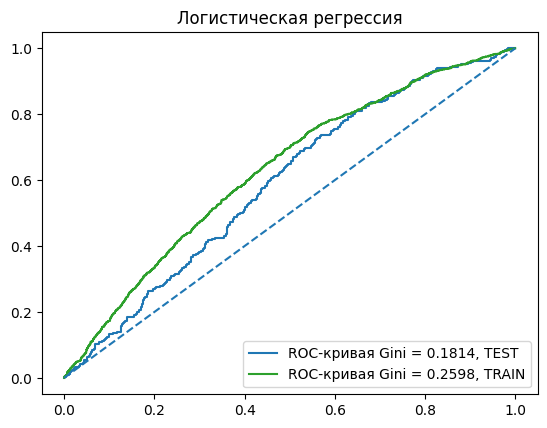

In [133]:
plt.plot(fpr_lr, tpr_lr, label='ROC-кривая Gini = %0.4f, TEST' % (Gini_lr), color='tab:blue')
plt.plot(fpr_o_lr, tpr_o_lr, label='ROC-кривая Gini = %0.4f, TRAIN' % (Gini_o_lr), color='tab:green')
plt.title('Логистическая регрессия')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1] , linestyle='--')

Видим переобучение

## Несбалансированность выборки

### 1ый подход - SMOTE

Не работает

In [134]:
#! pip install imbalanced-learn

In [135]:
#import imblearn
#from imblearn.over_sampling import SMOTE 

In [136]:
"""
y = data_selected['risk_event'].copy()
X = data_selected.copy()
del X['risk_event']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=y)
"""

"\ny = data_selected['risk_event'].copy()\nX = data_selected.copy()\ndel X['risk_event']\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, \n                                                    test_size=0.2, \n                                                    random_state=42, \n                                                    stratify=y)\n"

In [137]:
#X_train.describe()

In [138]:
"""
balanced = SMOTE(random_state=0)
balanced_data_X,balanced_data_y=balanced.fit_sample(X_train.fillna(-1), y_train)
balanced_data_X = pd.DataFrame(data=balanced_data_X,columns=X_train.columns)
balanced_data_y = pd.DataFrame(data=balanced_data_y,columns=['risk_event'])
"""

"\nbalanced = SMOTE(random_state=0)\nbalanced_data_X,balanced_data_y=balanced.fit_sample(X_train.fillna(-1), y_train)\nbalanced_data_X = pd.DataFrame(data=balanced_data_X,columns=X_train.columns)\nbalanced_data_y = pd.DataFrame(data=balanced_data_y,columns=['risk_event'])\n"

In [139]:
#balanced_data_X.describe()

In [140]:
#balanced_data_X = balanced_data_X.mask(balanced_data_X<0).copy()

In [141]:
#balanced_data_X.describe()

In [142]:
#balanced_data_X['risk_event'] = balanced_data_y

In [143]:
#y_test

In [144]:
#X_train

In [145]:
#X_test['risk_event'] = y_test

In [146]:

"""
    y = data['risk_event'].copy()
    X = data.copy()


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                        random_state = 42, stratify = y)
"""

"""
    X_train = balanced_data_X.copy()
    y_test = balanced_data_y.copy()
    
    auto_woe = AutoWoE(interpreted_model=True,
                     monotonic=False,
                     max_bin_count=5,
                     select_type=None,
                     pearson_th=0.9,
                     auc_th=.505,
                     vif_th=10.,
                     imp_th=0,
                     th_const=32,
                     force_single_split=True,
                     th_nan=0.01,
                     th_cat=0.005,
                     woe_diff_th=0.01,
                     min_bin_size=0.01,
                     min_bin_mults=(2, 4),
                     min_gains_to_split=(0.0, 0.5, 1.0),
                     auc_tol=1e-4,
                     cat_alpha=100,
                     cat_merge_to="to_woe_0",
                     nan_merge_to="to_woe_0",
                     oof_woe=True,
                     n_folds=6,
                     n_jobs=-1,
                     l1_grid_size=50,
                     l1_exp_scale=6,
                     imp_type="feature_imp",
                     regularized_refit=True,
                     p_val=0.05,
                     debug=False,
                     verbose=1
        )

    auto_woe = ReportDeco(auto_woe)
    
    auto_woe.fit(X_train, 
             target_name="risk_event",
             #features_type=features_type,
             group_kf=None,
             #max_bin_count=max_bin_count,
             #features_monotone_constraints=features_monotone_constraints,
             validation=X_test
            )
    
    pred = auto_woe.predict_proba(X_test)
    Gini_test = 2 * roc_auc_score(X_test['risk_event'], pred) - 1
    print('Gini_test:', Gini_test)
    
    
    pred = auto_woe.predict_proba(X_train)
    Gini_train = 2 * roc_auc_score(X_train['risk_event'], pred) - 1
    print('Gini_train:', Gini_train)
"""    

'\n    X_train = balanced_data_X.copy()\n    y_test = balanced_data_y.copy()\n    \n    auto_woe = AutoWoE(interpreted_model=True,\n                     monotonic=False,\n                     max_bin_count=5,\n                     select_type=None,\n                     pearson_th=0.9,\n                     auc_th=.505,\n                     vif_th=10.,\n                     imp_th=0,\n                     th_const=32,\n                     force_single_split=True,\n                     th_nan=0.01,\n                     th_cat=0.005,\n                     woe_diff_th=0.01,\n                     min_bin_size=0.01,\n                     min_bin_mults=(2, 4),\n                     min_gains_to_split=(0.0, 0.5, 1.0),\n                     auc_tol=1e-4,\n                     cat_alpha=100,\n                     cat_merge_to="to_woe_0",\n                     nan_merge_to="to_woe_0",\n                     oof_woe=True,\n                     n_folds=6,\n                     n_jobs=-1,\n      

## 2 подход  - оверсемплинг

Не работает

In [147]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [148]:
y = data_selected['risk_event'].copy()
X = data_selected.copy()
del X['risk_event']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=y)

In [149]:
sampler = RandomOverSampler()
x_new, y_new = sampler.fit_resample(X_train, y_train)

In [150]:
x_new['risk_event'] = y_new
X_train = x_new.copy()

In [151]:
X_test['risk_event'] = y_test

In [152]:
   
    auto_woe = AutoWoE(interpreted_model=True,
                     monotonic=False,
                     max_bin_count=5,
                     select_type=None,
                     pearson_th=0.9,
                     auc_th=.505,
                     vif_th=10.,
                     imp_th=0,
                     th_const=32,
                     force_single_split=True,
                     th_nan=0.01,
                     th_cat=0.005,
                     woe_diff_th=0.01,
                     min_bin_size=0.01,
                     min_bin_mults=(2, 4),
                     min_gains_to_split=(0.0, 0.5, 1.0),
                     auc_tol=1e-4,
                     cat_alpha=100,
                     cat_merge_to="to_woe_0",
                     nan_merge_to="to_maxfreq",
                     oof_woe=True,
                     n_folds=6,
                     n_jobs=-1,
                     l1_grid_size=50,
                     l1_exp_scale=6,
                     imp_type="feature_imp",
                     regularized_refit=False,
                     p_val=0.05,
                     debug=False,
                     verbose=1
        )

    auto_woe = ReportDeco(auto_woe)
    
    auto_woe.fit(X_train, 
             target_name="risk_event",
             #features_type=features_type,
             group_kf=None,
             #max_bin_count=max_bin_count,
             #features_monotone_constraints=features_monotone_constraints,
             validation=X_test
            )
    
    pred = auto_woe.predict_proba(X_test)
    Gini_test = 2 * roc_auc_score(X_test['risk_event'], pred) - 1
    print('Gini_test:', Gini_test)
    
    
    pred = auto_woe.predict_proba(X_train)
    Gini_train = 2 * roc_auc_score(X_train['risk_event'], pred) - 1
    print('Gini_train:', Gini_train)

Gini_test: 0.2872096892931695
Gini_train: 0.32101532963138


Не работает

## Лучшая модель

In [153]:
data_selected.columns

Index(['amount_issued', 'param_1', 'param_6', 'param_7', 'param_21',
       'param_94', 'param_115', 'param_116', 'param_128', 'param_148',
       'param_149', 'param_161', 'param_163', 'param_192', 'param_198',
       'param_201', 'param_204', 'param_227', 'param_228', 'param_229',
       'param_272', 'param_273', 'param_293', 'param_295', 'param_305',
       'loan_application_days', 'application_date_dayofweek',
       'param_122_date_day', 'param_122_date_dayofweek',
       'param_210_date_dayofweek', 'param_2', 'param_8', 'param_9', 'param_23',
       'param_87', 'param_110', 'param_113', 'param_114', 'param_129',
       'param_130', 'param_131', 'param_132', 'param_156', 'param_185',
       'param_188', 'param_193', 'param_196', 'param_203', 'param_214',
       'param_254', 'param_313', 'param_318', 'param_319',
       'param_122_date_month', 'param_210_date_month', 'risk_event'],
      dtype='object')

In [154]:
# удалим заведомо лишние признаки
features = ['param_6', 
        'param_21', 
        'param_94',
        'param_149',
        'param_161',
        'param_204',
        'param_229',
        'param_272',
        'param_8',
        'param_23',
        'param_87',
        'param_110',
        'param_130',
        'param_156',
        'param_196',
        'param_214',
        'param_313',
        'param_318',
        'param_319',
       'risk_event']

In [156]:
len(features)

20

## Здесь начинается отчет

Gini_test: 0.2768
Gini_train: 0.2812


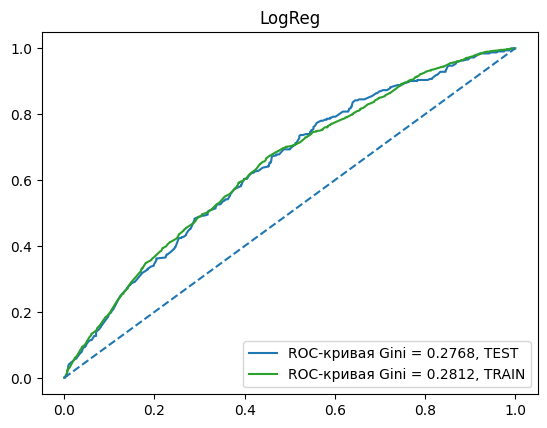

In [157]:
    y = data[features]['risk_event'].copy()
    X = data[features].copy()


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                        random_state = 42, stratify = y)
    
    auto_woe = AutoWoE(interpreted_model=True,
                     monotonic=False,
                     max_bin_count=5,
                     select_type=19, # выделим 19 признаков
                     pearson_th=0.9,
                     auc_th=.505,
                     vif_th=10.,
                     imp_th=0,
                     th_const=32,
                     force_single_split=True,
                     th_nan=0.01,
                     th_cat=0.005,
                     woe_diff_th=0.01,
                     min_bin_size=0.01,
                     min_bin_mults=(2, 4),
                     min_gains_to_split=(0.0, 0.5, 1.0),
                     auc_tol=1e-4,
                     cat_alpha=100,
                     cat_merge_to="to_woe_0",
                     nan_merge_to="to_woe_0",
                     oof_woe=True,
                     n_folds=6,
                     n_jobs=-1,
                     l1_grid_size=50,
                     l1_exp_scale=6,
                     imp_type="feature_imp",
                     regularized_refit=False,
                     p_val=0.05,
                     debug=False,
                     verbose=1
        )

    auto_woe = ReportDeco(auto_woe)
    
    auto_woe.fit(X_train, 
             target_name="risk_event",
             #features_type=features_type,
             group_kf=None,
             #max_bin_count=max_bin_count,
             #features_monotone_constraints=features_monotone_constraints,
             validation=X_test
            )
    
    pred_scr = auto_woe.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(X_test['risk_event'], pred_scr)
    roc_auc = roc_auc_score(X_test['risk_event'], pred_scr)
    Gini_test = round(2*round(float(roc_auc),4)-1,4)
    print('Gini_test:', Gini_test)
    
    
    pred_scr_o = auto_woe.predict_proba(X_train)
    fpr_o, tpr_o, thresholds_o = roc_curve(X_train['risk_event'], pred_scr_o)
    roc_auc_o = roc_auc_score(X_train['risk_event'], pred_scr_o)
    Gini_train = round(2*round(float(roc_auc_o),4)-1,4)
    print('Gini_train:', Gini_train)
    
    plt.plot(fpr, tpr, label='ROC-кривая Gini = %0.4f, TEST' % (Gini_test), color='tab:blue')
    plt.plot(fpr_o, tpr_o, label='ROC-кривая Gini = %0.4f, TRAIN' % (Gini_train), color='tab:green')
    plt.title('LogReg')
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1] , linestyle='--')

In [164]:
# сохранение отчета в отдельную папку
"""
report_params = {"automl_date_column": "report_month", # колонка с датой в формате params['datetimeFormat']
                 "output_path": "./AUTOWOE_REPORT_1", # папка, куда сгенерится отчет и сложатся нужные файлы
                 "report_name": "___НАЗВАНИЕ ОТЧЕТА___",
                 "report_version_id": 1,
                 "city": "Воронеж",
                 "model_aim": "___ЦЕЛЬ ПОСТРОЕНИЯ МОДЕЛИ___",
                 "model_name": "___НАЗВАНИЕ МОДЕЛИ___",
                 "zakazchik": "___ЗАКАЗЧИК___",
                 "high_level_department": "___ПОДРАЗДЕЛЕНИЕ___",
                 "ds_name": "___РАЗРАБОТЧИК МОДЕЛИ___",
                 "target_descr": "___ОПИСАНИЕ ЦЕЛЕВОГО СОБЫТИЯ___",
                 "non_target_descr": "___ОПИСАНИЕ НЕЦЕЛЕВОГО СОБЫТИЯ___"}

auto_woe.generate_report(report_params)
"""

'\nreport_params = {"automl_date_column": "report_month", # колонка с датой в формате params[\'datetimeFormat\']\n                 "output_path": "./AUTOWOE_REPORT_1", # папка, куда сгенерится отчет и сложатся нужные файлы\n                 "report_name": "___НАЗВАНИЕ ОТЧЕТА___",\n                 "report_version_id": 1,\n                 "city": "Воронеж",\n                 "model_aim": "___ЦЕЛЬ ПОСТРОЕНИЯ МОДЕЛИ___",\n                 "model_name": "___НАЗВАНИЕ МОДЕЛИ___",\n                 "zakazchik": "___ЗАКАЗЧИК___",\n                 "high_level_department": "___ПОДРАЗДЕЛЕНИЕ___",\n                 "ds_name": "___РАЗРАБОТЧИК МОДЕЛИ___",\n                 "target_descr": "___ОПИСАНИЕ ЦЕЛЕВОГО СОБЫТИЯ___",\n                 "non_target_descr": "___ОПИСАНИЕ НЕЦЕЛЕВОГО СОБЫТИЯ___"}\n\nauto_woe.generate_report(report_params)\n'

### !!! Внимание !!!  
Полноценный выгруженный отчет доступен по ссылке:  
https://drive.google.com/drive/folders/1XhnWWpMliONISFO7j03OIgi81U0SyY9p?usp=sharing

## Карта корреляций

In [158]:
corr = data[features].corr()
corr.style.background_gradient(cmap='coolwarm')

,param_6,param_21,param_94,param_149,param_161,param_204,param_229,param_272,param_8,param_23,param_87,param_110,param_130,param_156,param_196,param_214,param_313,param_318,param_319,risk_event
param_6,1.000000,0.024214,-0.100364,-0.059218,-0.045356,0.016523,-0.071131,-0.070019,-0.004136,0.094350,0.008832,-0.049567,-0.068784,-0.063069,-0.062679,-0.013268,-0.004866,-0.025151,-0.035213,-0.075235
param_21,0.024214,1.000000,0.084771,0.043285,0.092867,-0.277319,-0.022054,0.000892,-0.000456,-0.031441,-0.049488,0.061283,0.116818,0.090024,0.055692,-0.000186,0.051056,-0.031708,-0.035241,0.114828
param_94,-0.100364,0.084771,1.000000,0.012816,0.300079,-0.113538,-0.034796,-0.036788,-0.015190,0.006174,-0.014670,0.357156,0.371315,0.333840,0.271688,-0.056704,-0.020361,0.026388,-0.002691,0.030509
param_149,-0.059218,0.043285,0.012816,1.000000,0.048552,-0.038695,0.048112,0.042020,-0.006052,-0.051541,-0.018402,-0.000887,-0.096355,0.012999,0.000963,-0.014587,-0.025236,0.031308,0.051836,-0.020953
param_161,-0.045356,0.092867,0.300079,0.048552,1.000000,-0.131179,0.005248,-0.046467,-0.019264,-0.010964,-0.014779,0.225097,0.791325,0.384450,0.253948,0.034055,-0.005187,0.062697,0.038142,-0.005091
param_204,0.016523,-0.277319,-0.113538,-0.038695,-0.131179,1.000000,0.051704,0.007001,0.037323,-0.023622,0.095036,-0.079037,-0.149042,-0.108397,-0.113557,-0.025549,-0.056783,0.020222,0.078748,-0.152843
param_229,-0.071131,-0.022054,-0.034796,0.048112,0.005248,0.051704,1.000000,0.065041,0.012093,-0.042108,0.023834,-0.016095,0.019186,0.006275,-0.031692,-0.028940,-0.016547,0.027932,0.055334,-0.053034
param_272,-0.070019,0.000892,-0.036788,0.042020,-0.046467,0.007001,0.065041,1.000000,-0.008367,-0.083324,0.026988,-0.005187,-0.011930,-0.015893,-0.015603,-0.000487,-0.023823,0.029622,0.039006,-0.056846
param_8,-0.004136,-0.000456,-0.015190,-0.006052,-0.019264,0.037323,0.012093,-0.008367,1.000000,-0.003780,-0.013560,-0.004764,-0.019501,-0.001608,0.004627,-0.001826,-0.000164,0.013293,-0.002104,0.005491
param_23,0.094350,-0.031441,0.006174,-0.051541,-0.010964,-0.023622,-0.042108,-0.083324,-0.003780,1.000000,-0.013619,-0.017468,-0.017922,-0.019860,-0.006651,-0.014398,0.034917,-0.029827,-0.020801,0.001000


## WOE переменных

In [159]:
auto_woe.intercept

-1.044774218134649

In [160]:
auto_woe.features_fit

param_204   -0.888744
param_8     -0.822595
param_156   -0.671406
param_6     -1.167328
param_313   -0.740210
param_229   -0.783466
dtype: float64

In [161]:
features

['param_6',
 'param_21',
 'param_94',
 'param_149',
 'param_161',
 'param_204',
 'param_229',
 'param_272',
 'param_8',
 'param_23',
 'param_87',
 'param_110',
 'param_130',
 'param_156',
 'param_196',
 'param_214',
 'param_313',
 'param_318',
 'param_319',
 'risk_event']

In [162]:
# выведим WoE для каждго признака
for i in range(len(features)-1):
    print('=======================')
    print(features[i])
    print(auto_woe.get_woe(features[i]))
    print()

param_6
('-inf', '2.50')   -0.130816
('2.50', 'inf')     0.220017
__NaN_0__           0.000000
dtype: float64

param_21
('-inf', '1.50')    0.239347
('1.50', 'inf')    -0.332440
__NaN_0__           0.000000
dtype: float64

param_94
0              0.370500
1             -0.037471
__NaN_0__      0.000000
__Small_0__    0.000000
dtype: float64

param_149
('-inf', '4.00')   -0.030450
('4.00', '7.00')   -0.142626
('7.00', 'inf')     0.090535
__NaN__             0.061962
dtype: float64

param_161
('-inf', '2.50')     0.350458
('2.50', '8.50')    -0.129992
('8.50', '10.50')    0.004887
('10.50', 'inf')     0.480109
__NaN_0__            0.000000
dtype: float64

param_204
('-inf', '1.50')   -0.390541
('1.50', '2.50')   -0.041330
('2.50', 'inf')     0.483759
__NaN_0__           0.000000
dtype: float64

param_229
0              0.319293
1             -0.052989
__NaN_0__      0.000000
__Small_0__    0.000000
dtype: float64

param_272
0              0.265866
1             -0.100978
__NaN_0__      0

## Вывод

Была проведена настройка логистической регрессии с помощью автоматизированного пакета от Сбера.  
Часть данных была предобработана вручную. 
Наш Baseline улучшился с ~0.18 до ~0.28.  
Работа с XGBoost требует меньше времени и дает лучший результат, однако не выполнятся требование интерпретируемости. Как решение - например, пакет SHAP.  
  
Здесь представлен своего рода "Baseline", множество гипотез не было проверено - работа с пропусками, оптимизация гиперпараметров, подбор ансамбля, генерация признаков на основе других моделей и т.д.  

Полноценный выгруженный __отчет__ доступен по ссылке:  
https://drive.google.com/drive/folders/1XhnWWpMliONISFO7j03OIgi81U0SyY9p?usp=sharing

Для полноты катрины прикрепляю свой гитхаб:  
[github](https://github.com/qwertypine)

Научная страница на истине (здесь не всё, в следующие полгода планируется 2 статьи связанных с машинным обучением, где я - один из главных соавторов):  
[истина](https://istina.msu.ru/profile/trifonovnd/)

Мои блокноты на схожие темы:  
[Стратификация](https://nbviewer.jupyter.org/github/qwertypine/ML_test_tasks/blob/master/%D1%81hurn_stratification.ipynb)  
[Моделирование пропусков](https://nbviewer.jupyter.org/github/qwertypine/ML_test_tasks/blob/master/missing_data_modeling.ipynb)  